# Model optimisation

In this notebook, we attempt different ways of optimising the k-means algorithm used in the recommendation system. These include: <br> 1. Dropping 'authors' column <br> 2. Dropping 'categories' column <br> 3. Filtering published year <br> 4. Binning published year

In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

In [2]:
# Load data and set title as index
df = pd.read_csv("../data/cleaned_data.csv", index_col = "title")

# Drop unnamed column
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

isbn13      isbn10 subtitle  \
title                                                
Gilead          9780002005883  0002005883      NaN   
Spider's Web    9780002261982  0002261987  A Novel   
The One Tree    9780006163831  0006163831      NaN   
Rage of angels  9780006178736  0006178731      NaN   
The Four Loves  9780006280897  0006280897      NaN   

                                        authors  \
title                                             
Gilead                       Marilynne Robinson   
Spider's Web    Charles Osborne;Agatha Christie   
The One Tree               Stephen R. Donaldson   
Rage of angels                   Sidney Sheldon   
The Four Loves              Clive Staples Lewis   

                                   categories  \
title                                           
Gilead                                Fiction   
Spider's Web    Detective and mystery stories   
The One Tree                 American fiction   
Rage of angels                        Fiction   
The Four Loves                 Christian life   

                                                        thumbnail  \
title                                                               
Gilead          http://books.google.com/books/content?id=KQZCP...   
Spider's Web    http://books.google.com/books/content?id=gA5GP...   
The One Tree    http://books.google.com/books/content?id=OmQaw...   
Rage of angels  http://books.google.com/books/content?id=FKo2T...   
The Four Loves  http://books.google.com/books/content?id=XhQ5X...   

                                                      description  \
title                                                               
Gilead          A NOVEL THAT READERS and critics have been eag...   
Spider's Web    A new 'Christie for Christmas' -- a full-lengt...   
The One Tree    Volume Two of Stephen Donaldson's acclaimed se...   
Rage of angels  A memorable, mesmerizing heroine Jennifer -- b...   
The Four Loves  Lewis' work on the nature of love divides love...   

                published_year  average_rating  num_pages  ratings_count  
title                                                                     
Gilead                  2004.0            3.85      247.0          361.0  
Spider's Web            2000.0            3.83      241.0         5164.0  
The One Tree            1982.0            3.97      479.0          172.0  
Rage of angels          1993.0            3.93      512.0        29532.0  
The Four Loves          2002.0            4.15      170.0        33684.0

## 1. Drop authors

### Prepare the data

In [3]:
# Drop columns that we are not using as features - including the authors column
df_reduced = df.drop(columns=["isbn13", "isbn10", "subtitle", "authors", "thumbnail", "description"])
df_reduced.head()

categories  published_year  average_rating  \
title                                                                           
Gilead                                Fiction          2004.0            3.85   
Spider's Web    Detective and mystery stories          2000.0            3.83   
The One Tree                 American fiction          1982.0            3.97   
Rage of angels                        Fiction          1993.0            3.93   
The Four Loves                 Christian life          2002.0            4.15   

                num_pages  ratings_count  
title                                     
Gilead              247.0          361.0  
Spider's Web        241.0         5164.0  
The One Tree        479.0          172.0  
Rage of angels      512.0        29532.0  
The Four Loves      170.0        33684.0

In [4]:
# One hot-encode categorical variables
dummies_df = pd.get_dummies(df_reduced, columns=["categories", "published_year"])

In [5]:
# Scale the numeric variables
scaled_data = StandardScaler().fit_transform(dummies_df)

In [6]:
# Create a DataFrame with the scaled data
dummies_df_scaled = pd.DataFrame(
    scaled_data,
    columns= dummies_df.columns
)

# Copy the title names from the data
dummies_df_scaled["title"] = dummies_df.index

# Set the coinid column as index
dummies_df_scaled.set_index("title", inplace = True)

# Display sample data
dummies_df_scaled.head()

average_rating  num_pages  ratings_count  \
title                                                      
Gilead               -0.231295  -0.418666      -0.157864   
Spider's Web         -0.291564  -0.444161      -0.117492   
The One Tree          0.130323   0.567149      -0.159453   
Rage of angels        0.009784   0.707373       0.087337   
The Four Loves        0.672749  -0.745854       0.122237   

                categories_87th Precinct (Imaginary place)  \
title                                                        
Gilead                                           -0.012914   
Spider's Web                                     -0.012914   
The One Tree                                     -0.012914   
Rage of angels                                   -0.012914   
The Four Loves                                   -0.012914   

                categories_Abandoned mines  categories_Aboriginal Australians  \
title                                                                           
Gilead                           -0.012914                          -0.012914   
Spider's Web                     -0.012914                          -0.012914   
The One Tree                     -0.012914                          -0.012914   
Rage of angels                   -0.012914                          -0.012914   
The Four Loves                   -0.012914                          -0.012914   

                categories_Abused wives  categories_Accidents  \
title                                                           
Gilead                        -0.012914             -0.012914   
Spider's Web                  -0.012914             -0.012914   
The One Tree                  -0.012914             -0.012914   
Rage of angels                -0.012914             -0.012914   
The Four Loves                -0.012914             -0.012914   

                categories_Actors  categories_Actors and actresses  ...  \
title                                                               ...   
Gilead                  -0.012914                        -0.012914  ...   
Spider's Web            -0.012914                        -0.012914  ...   
The One Tree            -0.012914                        -0.012914  ...   
Rage of angels          -0.012914                        -0.012914  ...   
The Four Loves          -0.012914                        -0.012914  ...   

                published_year_2008.0  published_year_2009.0  \
title                                                          
Gilead                      -0.036548              -0.022372   
Spider's Web                -0.036548              -0.022372   
The One Tree                -0.036548              -0.022372   
Rage of angels              -0.036548              -0.022372   
The Four Loves              -0.036548              -0.022372   

                published_year_2010.0  published_year_2011.0  \
title                                                          
Gilead                      -0.031647              -0.022372   
Spider's Web                -0.031647              -0.022372   
The One Tree                -0.031647              -0.022372   
Rage of angels              -0.031647              -0.022372   
The Four Loves              -0.031647              -0.022372   

                published_year_2012.0  published_year_2013.0  \
title                                                          
Gilead                      -0.018265              -0.022372   
Spider's Web                -0.018265              -0.022372   
The One Tree                -0.018265              -0.022372   
Rage of angels              -0.018265              -0.022372   
The Four Loves              -0.018265              -0.022372   

                published_year_2014.0  published_year_2015.0  \
title                                                          
Gilead                      -0.018265              -0.028887   
Spider's Web                -0.018265              -0.028887   
The One

### Find best number of K - elbow method

In [7]:
# Create a list with the number of k-values from 1 to 21 
k = list(range(1, 11))
inertia = []

for i in k:
    k_model = KMeans(n_clusters=i, random_state=42)
    k_model.fit(dummies_df_scaled)
    inertia.append(k_model.inertia_)

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

In [8]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [9]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

elbow_plot

:Curve   [k]   (inertia)

### Find best number of K - silhouette method

In [10]:
range_n_clusters = [2, 3, 4, 10, 25]

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.7882187745428823


C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : -0.1949303503750588


C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.6137005464427335


C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10 The average silhouette_score is : 0.25553656986731516


C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 25 The average silhouette_score is : -0.20383564962662756


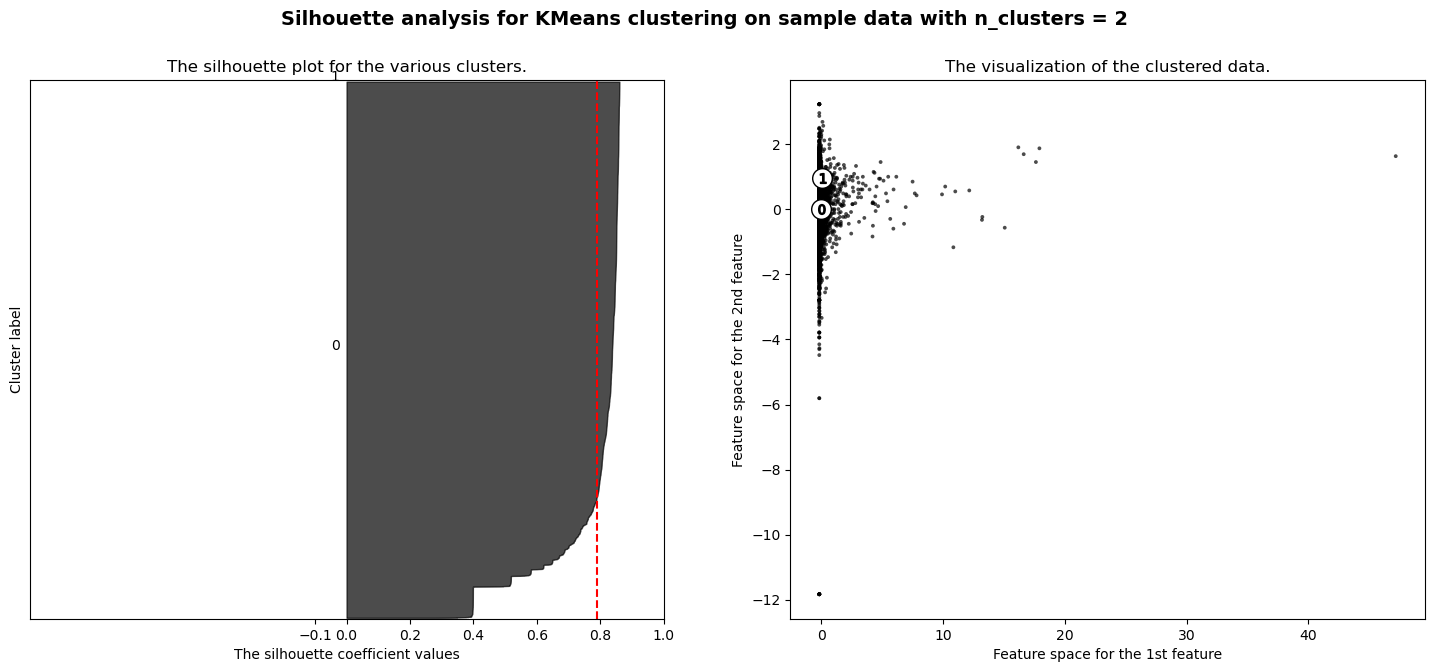

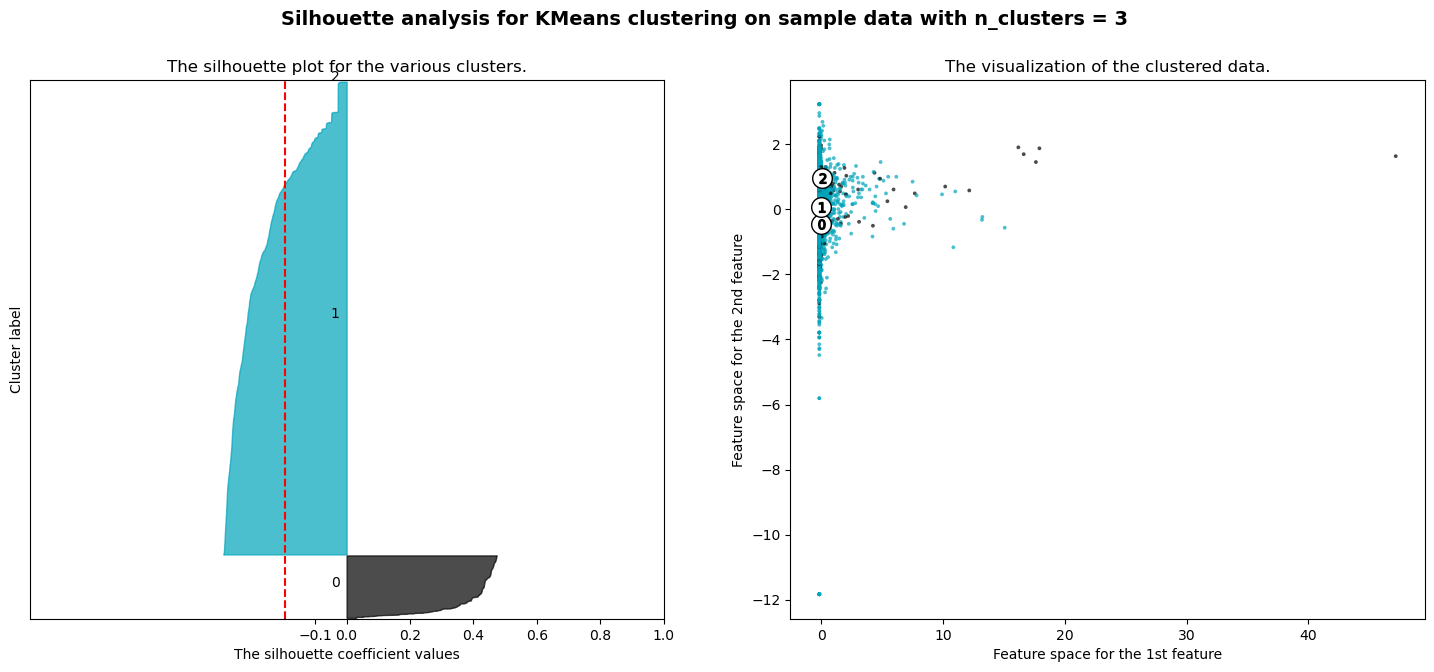

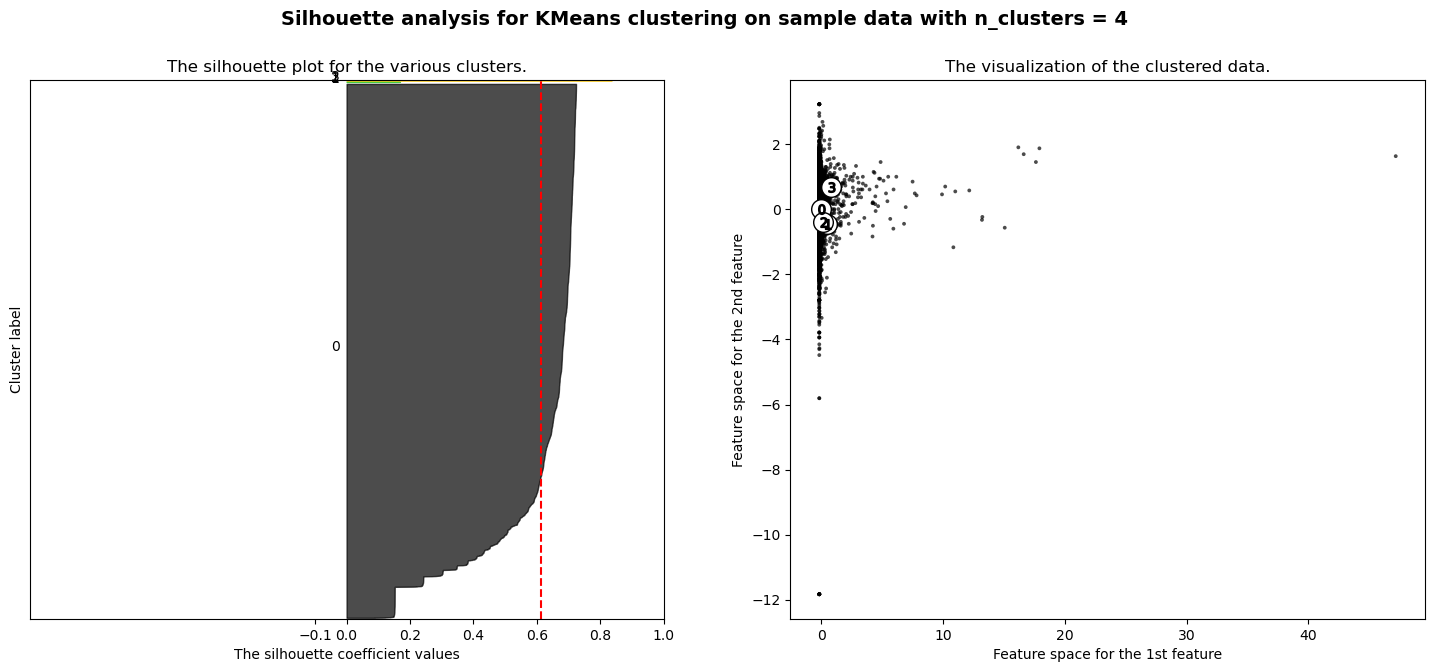

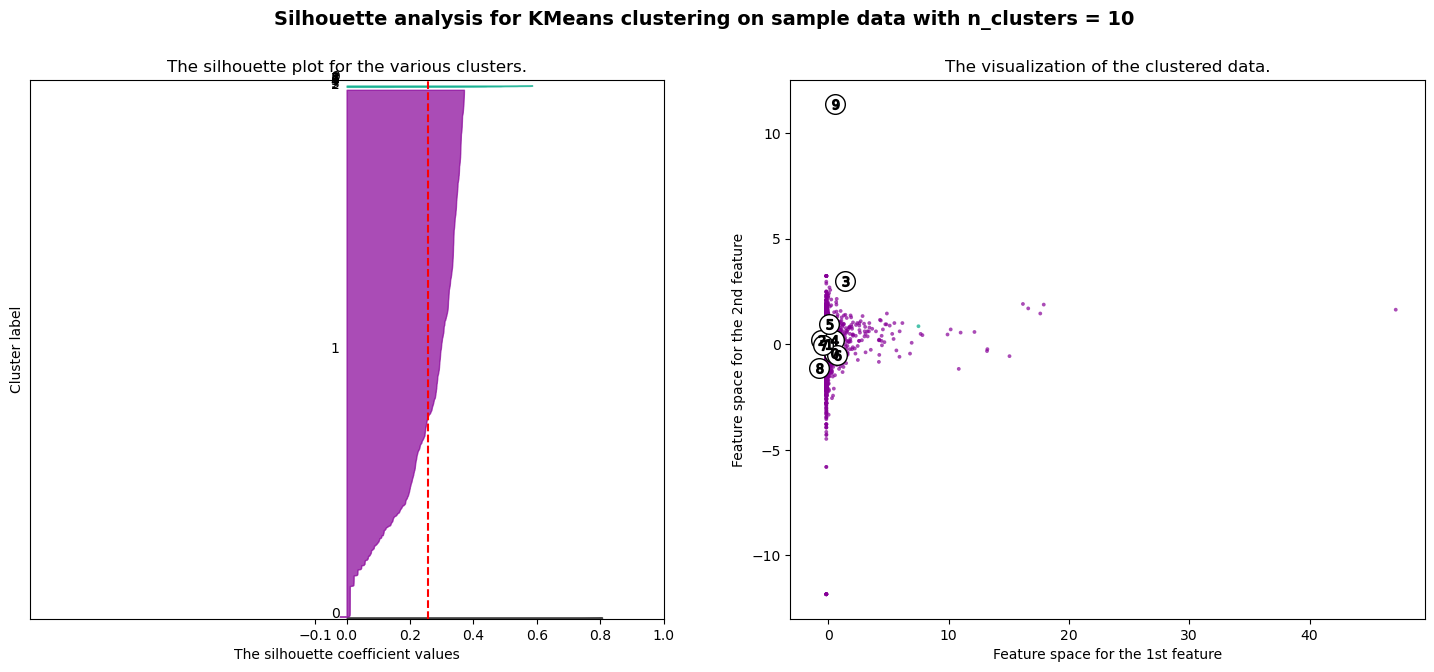

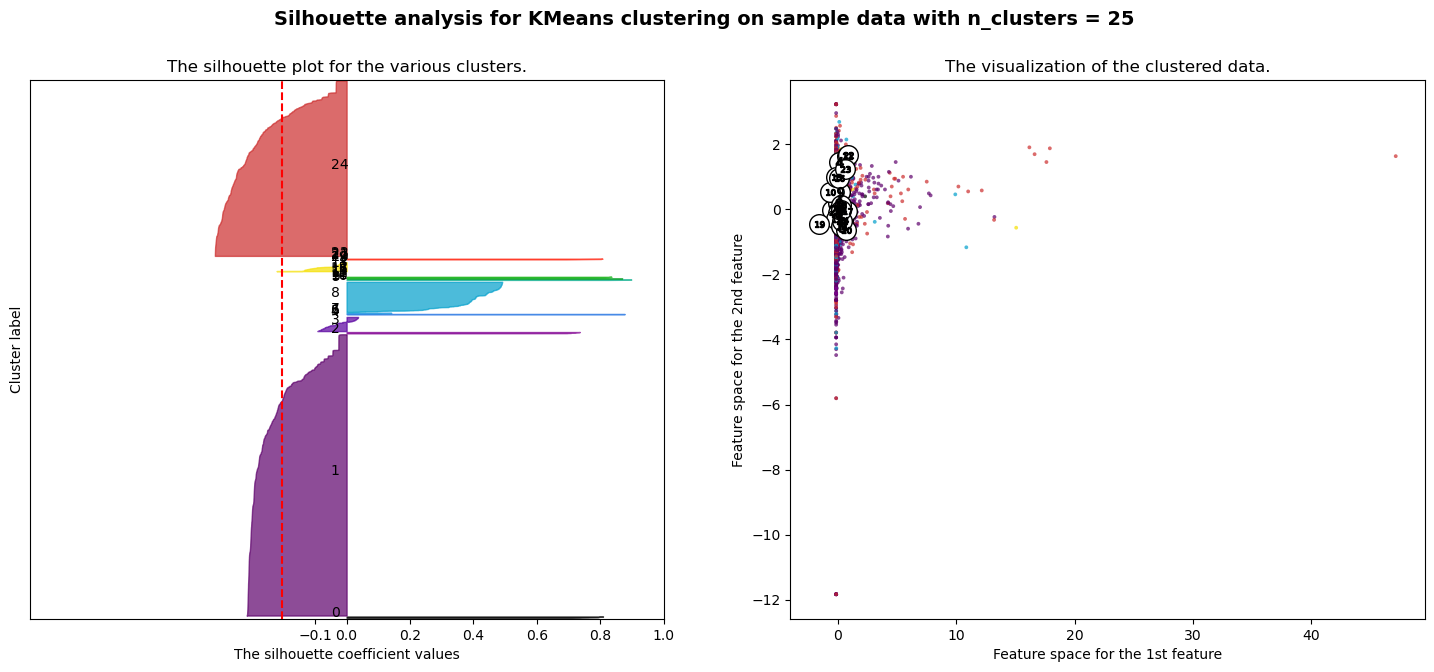

In [11]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1 to 1
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dummies_df_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(dummies_df_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dummies_df_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dummies_df_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        dummies_df_scaled["ratings_count"], dummies_df_scaled["average_rating"], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### Run clustering model

In [12]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=2, random_state=42)

In [13]:
# Fit the K-Means model
model.fit(dummies_df_scaled)

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [14]:
# Predict the clusters using the scaled data
predictions = model.predict(dummies_df_scaled)

# Print the resulting array of cluster values.
# print(predictions)

In [15]:
# Create a copy of the DataFrame
predictions_df = dummies_df_scaled.copy()

In [16]:
# Add a new column to the DataFrame with the predicted clusters
predictions_df["predicted_clusters"] = predictions

# Display sample data
predictions_df.head()

average_rating  num_pages  ratings_count  \
title                                                      
Gilead               -0.231295  -0.418666      -0.157864   
Spider's Web         -0.291564  -0.444161      -0.117492   
The One Tree          0.130323   0.567149      -0.159453   
Rage of angels        0.009784   0.707373       0.087337   
The Four Loves        0.672749  -0.745854       0.122237   

                categories_87th Precinct (Imaginary place)  \
title                                                        
Gilead                                           -0.012914   
Spider's Web                                     -0.012914   
The One Tree                                     -0.012914   
Rage of angels                                   -0.012914   
The Four Loves                                   -0.012914   

                categories_Abandoned mines  categories_Aboriginal Australians  \
title                                                                           
Gilead                           -0.012914                          -0.012914   
Spider's Web                     -0.012914                          -0.012914   
The One Tree                     -0.012914                          -0.012914   
Rage of angels                   -0.012914                          -0.012914   
The Four Loves                   -0.012914                          -0.012914   

                categories_Abused wives  categories_Accidents  \
title                                                           
Gilead                        -0.012914             -0.012914   
Spider's Web                  -0.012914             -0.012914   
The One Tree                  -0.012914             -0.012914   
Rage of angels                -0.012914             -0.012914   
The Four Loves                -0.012914             -0.012914   

                categories_Actors  categories_Actors and actresses  ...  \
title                                                               ...   
Gilead                  -0.012914                        -0.012914  ...   
Spider's Web            -0.012914                        -0.012914  ...   
The One Tree            -0.012914                        -0.012914  ...   
Rage of angels          -0.012914                        -0.012914  ...   
The Four Loves          -0.012914                        -0.012914  ...   

                published_year_2009.0  published_year_2010.0  \
title                                                          
Gilead                      -0.022372              -0.031647   
Spider's Web                -0.022372              -0.031647   
The One Tree                -0.022372              -0.031647   
Rage of angels              -0.022372              -0.031647   
The Four Loves              -0.022372              -0.031647   

                published_year_2011.0  published_year_2012.0  \
title                                                          
Gilead                      -0.022372              -0.018265   
Spider's Web                -0.022372              -0.018265   
The One Tree                -0.022372              -0.018265   
Rage of angels              -0.022372              -0.018265   
The Four Loves              -0.022372              -0.018265   

                published_year_2013.0  published_year_2014.0  \
title                                                          
Gilead                      -0.022372              -0.018265   
Spider's Web                -0.022372              -0.018265   
The One Tree                -0.022372              -0.018265   
Rage of angels              -0.022372              -0.018265   
The Four Loves              -0.022372              -0.018265   

                published_year_2015.0  published_year_2017.0  \
title                                                          
Gilead                      -0.028887              -0.018265   
Spider's Web                -0.028887              -0.018265   
The One

In [17]:
clusters_plot = predictions_df.hvplot.scatter(
    x="average_rating",
    y="ratings_count",
    by = "predicted_clusters",
    hover_cols= "title"
)

clusters_plot

:NdOverlay   [predicted_clusters]
   :Scatter   [average_rating]   (ratings_count,title)

### Evaluate the model

In [18]:
# Evaluate using the Calinski-Harabasz Index
labels = model.labels_
metrics.calinski_harabasz_score(dummies_df_scaled, labels)

20.894316192148388

### PCA

In [19]:
# Create a PCA model instance
pca = PCA(n_components=2)

In [20]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
transformed_df = pca.fit_transform(dummies_df_scaled)

In [21]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.00346355, 0.00345396])

In [22]:
# Create the PCA DataFrame
pca_df = pd.DataFrame(
    transformed_df,
    columns=["PCA1", "PCA2"]
)

# Review the PCA DataFrame
pca_df.head()

PCA1      PCA2
0  0.016494 -0.098213
1  0.084835  0.150160
2 -0.259186  0.404105
3  0.037523  0.004337
4  0.065722 -0.004315

In [23]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

for i in k:
    k_model = KMeans(n_clusters=i, random_state=42)
    k_model.fit(pca_df)
    inertia.append(k_model.inertia_)

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

In [24]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

In [25]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

In [26]:
# Define the model Kmeans model using the optimal value of k for the number of clusters.
model = KMeans(n_clusters=3, random_state=42)

# Fit the model
model.fit(pca_df)

# Make predictions
predictions = model.predict(pca_df)

# Create a copy of the pca_df DataFrame
pca_predictions_df = pca_df.copy()

# Add a class column with the labels
pca_predictions_df["predicted_clusters"] = predictions

# Add book title so that we can check how books are being clustered
pca_predictions_df["title"] = dummies_df_scaled.index

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
# Plot the clusters
pca_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="predicted_clusters",
    hover_cols = "title"
)

:NdOverlay   [predicted_clusters]
   :Scatter   [PCA1]   (PCA2,title)

In [28]:
# Evaluate using the Calinski-Harabasz Index
labels = model.labels_
metrics.calinski_harabasz_score(pca_df, labels)

177156.04794305906

### Optimization when dropping the authors columns

- The optimum k-value is still not clear using the standard elbow method; the silhouette method suggests 2 as the best value for k. Running a K-means model with 2 clusters resuts in a Calinski-Harabasz Index score of 20.89.
- Decomposing the data into 2 principal components, suggests best k-value for PCA data is 3. Running the K-means algorithm on PCA transformed data without the authors column increase the Calinski-Harabasz Index to 177156.05, compared to 34860.91 in the original PCA model. Just as in the original PCA model, this result seems highly determined by 2 outlier books. See model_optimisation_no_outliers for a similar model that excludes these books.

## 2. Drop categories

### Prepare the data 

In [29]:
# Drop columns that we are not using as features - inclusing categories column
df_reduced = df.drop(columns=["isbn13", "isbn10", "subtitle", "categories", "thumbnail", "description"])
df_reduced.head()

authors  published_year  \
title                                                             
Gilead                       Marilynne Robinson          2004.0   
Spider's Web    Charles Osborne;Agatha Christie          2000.0   
The One Tree               Stephen R. Donaldson          1982.0   
Rage of angels                   Sidney Sheldon          1993.0   
The Four Loves              Clive Staples Lewis          2002.0   

                average_rating  num_pages  ratings_count  
title                                                     
Gilead                    3.85      247.0          361.0  
Spider's Web              3.83      241.0         5164.0  
The One Tree              3.97      479.0          172.0  
Rage of angels            3.93      512.0        29532.0  
The Four Loves            4.15      170.0        33684.0

In [30]:
# One hot-encode categorical variables
dummies_df = pd.get_dummies(df_reduced, columns=["authors", "published_year"])

In [31]:
# Scale the numeric variables
scaled_data = StandardScaler().fit_transform(dummies_df)

In [32]:
# Create a DataFrame with the scaled data
dummies_df_scaled = pd.DataFrame(
    scaled_data,
    columns= dummies_df.columns
)

# Copy the title names from the data
dummies_df_scaled["title"] = dummies_df.index

# Set the coinid column as index
dummies_df_scaled.set_index("title", inplace = True)

# Display sample data
dummies_df_scaled.head()

average_rating  num_pages  ratings_count  authors_A. Hatto  \
title                                                                        
Gilead               -0.231295  -0.418666      -0.157864         -0.012914   
Spider's Web         -0.291564  -0.444161      -0.117492         -0.012914   
The One Tree          0.130323   0.567149      -0.159453         -0.012914   
Rage of angels        0.009784   0.707373       0.087337         -0.012914   
The Four Loves        0.672749  -0.745854       0.122237         -0.012914   

                authors_A. M. Homes  authors_A. N. Roquelaure;Anne Rice  \
title                                                                     
Gilead                    -0.018265                           -0.012914   
Spider's Web              -0.018265                           -0.012914   
The One Tree              -0.018265                           -0.012914   
Rage of angels            -0.018265                           -0.012914   
The Four Loves            -0.018265                           -0.012914   

                authors_A.N. Roquelaure  authors_Aaron Allston  \
title                                                            
Gilead                        -0.012914              -0.012914   
Spider's Web                  -0.012914              -0.012914   
The One Tree                  -0.012914              -0.012914   
Rage of angels                -0.012914              -0.012914   
The Four Loves                -0.012914              -0.012914   

                authors_Abbie Hoffman  authors_Abd Al-Hayy Moore  ...  \
title                                                             ...   
Gilead                      -0.012914                  -0.012914  ...   
Spider's Web                -0.012914                  -0.012914  ...   
The One Tree                -0.012914                  -0.012914  ...   
Rage of angels              -0.012914                  -0.012914  ...   
The Four Loves              -0.012914                  -0.012914  ...   

                published_year_2008.0  published_year_2009.0  \
title                                                          
Gilead                      -0.036548              -0.022372   
Spider's Web                -0.036548              -0.022372   
The One Tree                -0.036548              -0.022372   
Rage of angels              -0.036548              -0.022372   
The Four Loves              -0.036548              -0.022372   

                published_year_2010.0  published_year_2011.0  \
title                                                          
Gilead                      -0.031647              -0.022372   
Spider's Web                -0.031647              -0.022372   
The One Tree                -0.031647              -0.022372   
Rage of angels              -0.031647              -0.022372   
The Four Loves              -0.031647              -0.022372   

                published_year_2012.0  published_year_2013.0  \
title                                                          
Gilead                      -0.018265              -0.022372   
Spider's Web                -0.018265              -0.022372   
The One Tree                -0.018265              -0.022372   
Rage of angels              -0.018265              -0.022372   
The Four Loves              -0.018265              -0.022372   

                published_year_2014.0  published_year_2015.0  \
title                                                          
Gilead                      -0.018265              -0.028887   
Spider's Web                -0.018265              -0.028887   
The One Tree                -0.018265              -0.028887   
Rage of angels              -0.018265              -0.028887   
The Four Loves              -0.018265              -0.028887   

                published_year_2017.0  published_year_2019.0  
title                                                         
Gilead                      -0.018265         

### Find best number of K - elbow method

In [33]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))
inertia = []

for i in k:
    k_model = KMeans(n_clusters=i, random_state=42)
    k_model.fit(dummies_df_scaled)
    inertia.append(k_model.inertia_)

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

In [34]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [35]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

elbow_plot

:Curve   [k]   (inertia)

### Find best number of K - silhouette method

In [36]:
range_n_clusters = [2, 3, 4, 10, 25]

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.015966685148478096


C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.16274103295339085


C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : -0.08912469532736687


C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10 The average silhouette_score is : -0.21234737805068196


C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 25 The average silhouette_score is : -0.2218851547695474


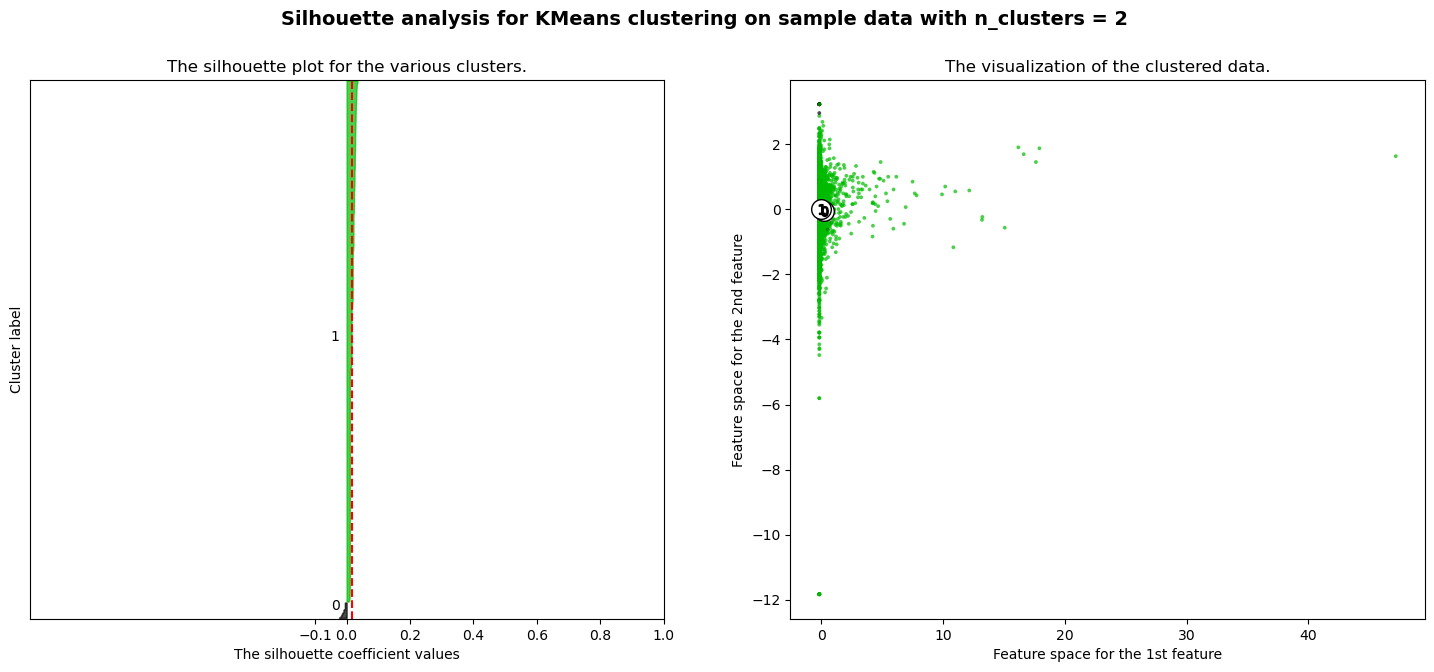

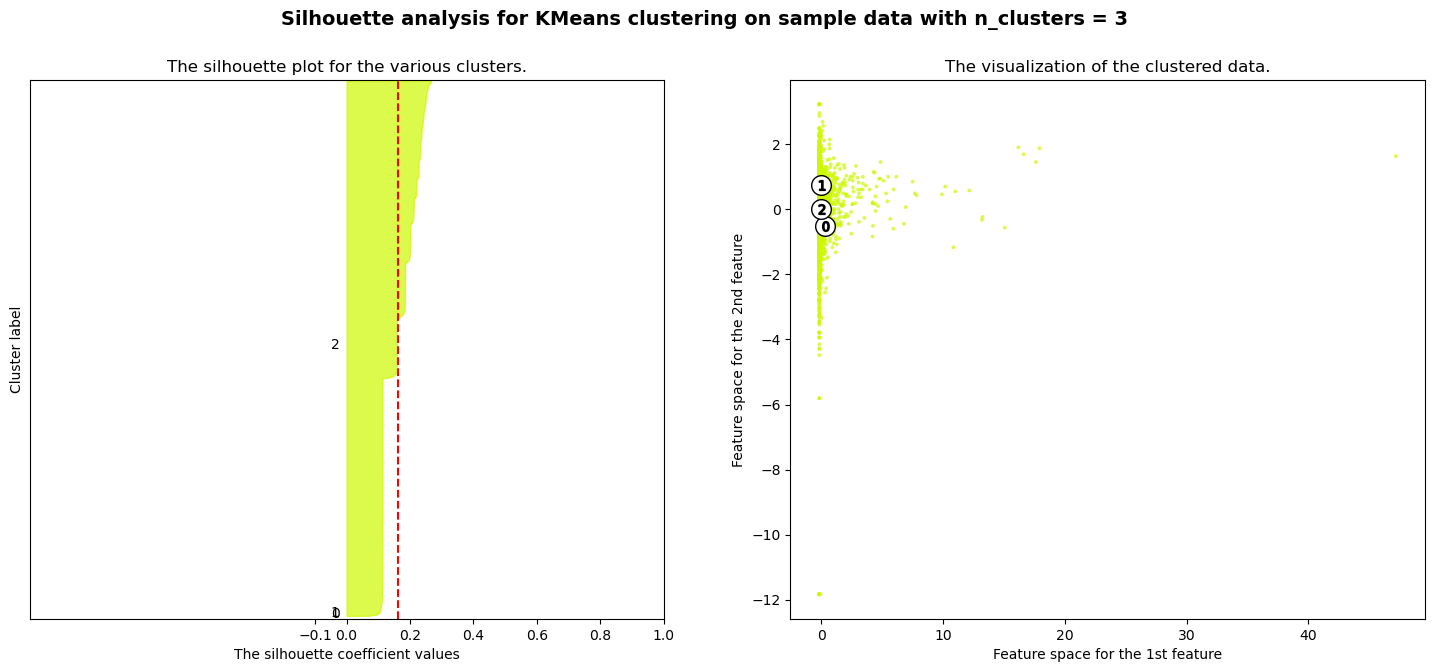

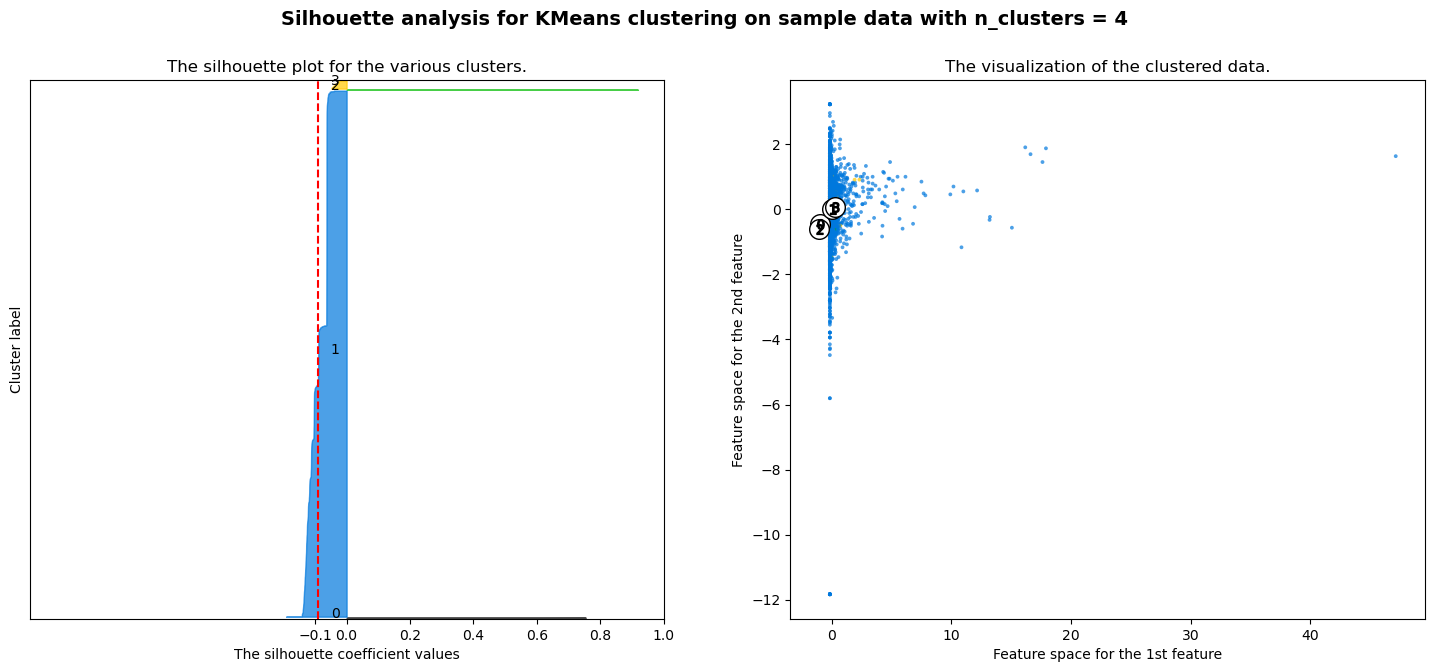

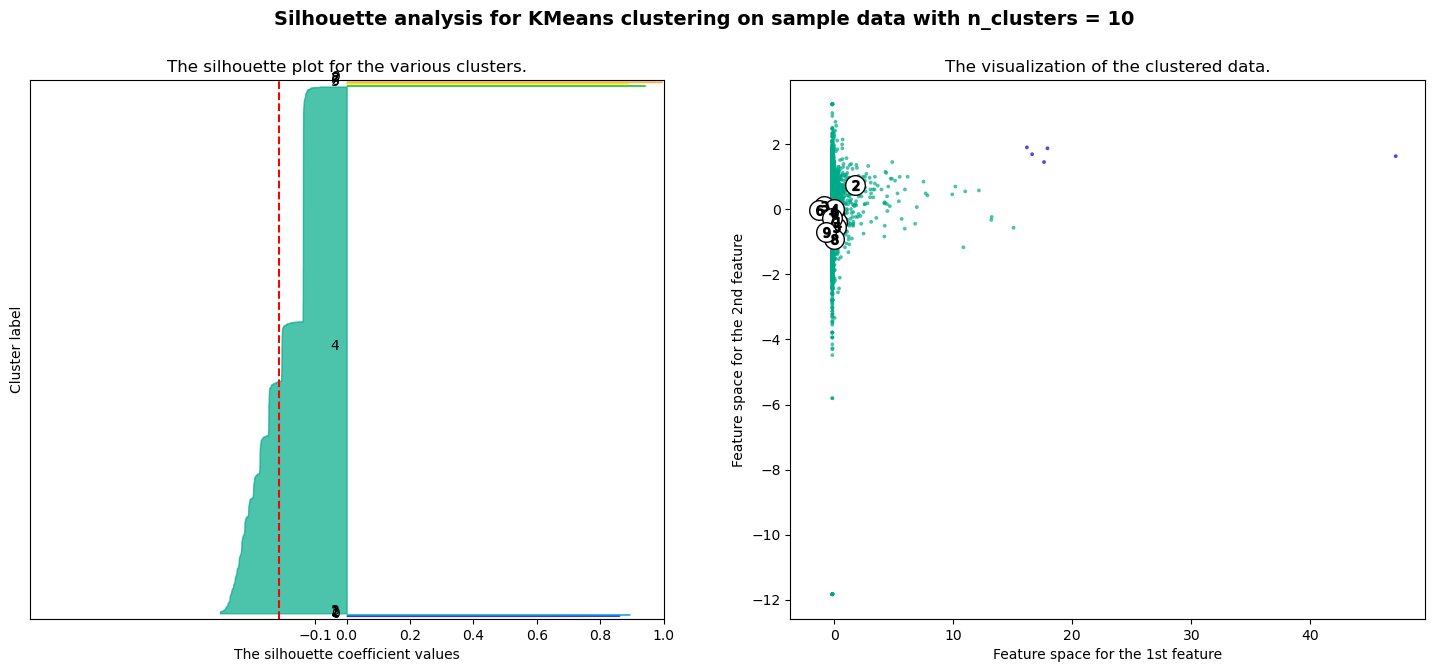

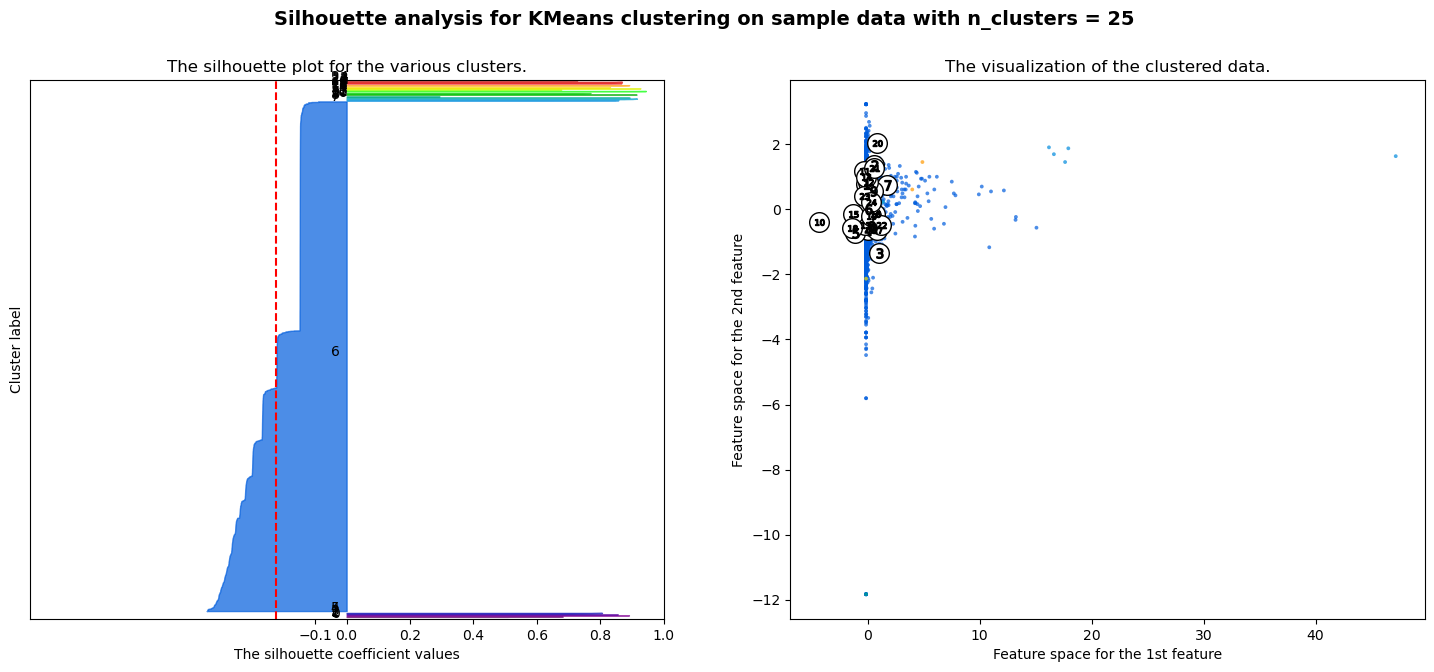

In [37]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1 to 1
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dummies_df_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(dummies_df_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dummies_df_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dummies_df_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        dummies_df_scaled["ratings_count"], dummies_df_scaled["average_rating"], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### Run clustering model

In [38]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3, random_state=42)

In [39]:
# Fit the K-Means model
model.fit(dummies_df_scaled)

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [40]:
# Predict the clusters using the scaled data
predictions = model.predict(dummies_df_scaled)

# Print the resulting array of cluster values.
# print(predictions)

In [41]:
# Create a copy of the DataFrame
predictions_df = dummies_df_scaled.copy()

In [42]:
# Add a new column to the DataFrame with the predicted clusters
predictions_df["predicted_clusters"] = predictions

# Display sample data
predictions_df.head()

average_rating  num_pages  ratings_count  authors_A. Hatto  \
title                                                                        
Gilead               -0.231295  -0.418666      -0.157864         -0.012914   
Spider's Web         -0.291564  -0.444161      -0.117492         -0.012914   
The One Tree          0.130323   0.567149      -0.159453         -0.012914   
Rage of angels        0.009784   0.707373       0.087337         -0.012914   
The Four Loves        0.672749  -0.745854       0.122237         -0.012914   

                authors_A. M. Homes  authors_A. N. Roquelaure;Anne Rice  \
title                                                                     
Gilead                    -0.018265                           -0.012914   
Spider's Web              -0.018265                           -0.012914   
The One Tree              -0.018265                           -0.012914   
Rage of angels            -0.018265                           -0.012914   
The Four Loves            -0.018265                           -0.012914   

                authors_A.N. Roquelaure  authors_Aaron Allston  \
title                                                            
Gilead                        -0.012914              -0.012914   
Spider's Web                  -0.012914              -0.012914   
The One Tree                  -0.012914              -0.012914   
Rage of angels                -0.012914              -0.012914   
The Four Loves                -0.012914              -0.012914   

                authors_Abbie Hoffman  authors_Abd Al-Hayy Moore  ...  \
title                                                             ...   
Gilead                      -0.012914                  -0.012914  ...   
Spider's Web                -0.012914                  -0.012914  ...   
The One Tree                -0.012914                  -0.012914  ...   
Rage of angels              -0.012914                  -0.012914  ...   
The Four Loves              -0.012914                  -0.012914  ...   

                published_year_2009.0  published_year_2010.0  \
title                                                          
Gilead                      -0.022372              -0.031647   
Spider's Web                -0.022372              -0.031647   
The One Tree                -0.022372              -0.031647   
Rage of angels              -0.022372              -0.031647   
The Four Loves              -0.022372              -0.031647   

                published_year_2011.0  published_year_2012.0  \
title                                                          
Gilead                      -0.022372              -0.018265   
Spider's Web                -0.022372              -0.018265   
The One Tree                -0.022372              -0.018265   
Rage of angels              -0.022372              -0.018265   
The Four Loves              -0.022372              -0.018265   

                published_year_2013.0  published_year_2014.0  \
title                                                          
Gilead                      -0.022372              -0.018265   
Spider's Web                -0.022372              -0.018265   
The One Tree                -0.022372              -0.018265   
Rage of angels              -0.022372              -0.018265   
The Four Loves              -0.022372              -0.018265   

                published_year_2015.0  published_year_2017.0  \
title                                                          
Gilead                      -0.028887              -0.018265   
Spider's Web                -0.028887              -0.018265   
The One Tree                -0.028887              -0.018265   
Rage of angels              -0.028887              -0.018265   
The Four Loves              -0.028887              -0.018265   

                published_year_2019.0  predicted_clusters  
title                                                      
Gilead                      -0.028887               

In [43]:
clusters_plot = predictions_df.hvplot.scatter(
    x="average_rating",
    y="ratings_count",
    by = "predicted_clusters",
    hover_cols= "title"
)

clusters_plot

:NdOverlay   [predicted_clusters]
   :Scatter   [average_rating]   (ratings_count,title)

### Evaluate the model

In [44]:
# Evaluate the model using the Calinski-Harabasz Index
labels = model.labels_
metrics.calinski_harabasz_score(dummies_df_scaled, labels)

1.9511851149357164

### PCA

In [45]:
# Create a PCA model instance
pca = PCA(n_components=2)

In [46]:
# Use the PCA model with `fit_transform` to reduce to 2 principal components
transformed_df = pca.fit_transform(dummies_df_scaled)

In [47]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.00072116, 0.0005594 ])

In [48]:
# Create the PCA DataFrame
pca_df = pd.DataFrame(
    transformed_df,
    columns=["PCA1", "PCA2"]
)

# Review the PCA DataFrame
pca_df.head()

PCA1      PCA2
0 -0.171776  0.424500
1 -0.110667  1.307278
2 -0.354171 -1.746518
3  0.022860 -0.374380
4  0.140754  0.123360

In [49]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

In [50]:
for i in k:
    k_model = KMeans(n_clusters=i, random_state=42)
    k_model.fit(pca_df)
    inertia.append(k_model.inertia_)

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

In [51]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

In [52]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

In [53]:
# Define the model Kmeans model using the optimal value of k for the number of clusters.
model = KMeans(n_clusters=4, random_state=42)

# Fit the model
model.fit(pca_df)

# Make predictions
predictions = model.predict(pca_df)

# Create a copy of the customers_pca_df DataFrame
pca_predictions_df = pca_df.copy()

# Add a class column with the labels
pca_predictions_df["predicted_clusters"] = predictions

# Add book title
pca_predictions_df["title"] = dummies_df_scaled.index

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [54]:
# Plot the clusters
pca_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="predicted_clusters",
    hover_cols = "title"
)

:NdOverlay   [predicted_clusters]
   :Scatter   [PCA1]   (PCA2,title)

The elbow curve in the PCA transformed data seems to offer a clearer optimum value of K. Accordingly, we ran the model with 4 clusters. 

In [55]:
# Evaluate using the Calinski-Harabasz Index
labels = model.labels_
metrics.calinski_harabasz_score(pca_df, labels)

5600.919063594828

### Optimization when dropping the categories columns

- The model without the "categories" performs worse than the model without the "authors" column. Similarly to the previous model, eliminating the categories does not result in a clear k-value when using the elbow method. The silhouette method suggests 3 as the best value for k. Running a K-means model with 3 clusters resuts in a Calinski-Harabasz Index score of 1.95. This values is lower than both the original model and the model without the "authors" column. 
- Running the K-means algorithm on PCA transformed data (with 2 principal components and k = 4) without the "categories" column however, increased the Calinski-Harabasz Index to 5600.92. Again, this is a lower score than the original model and than the model without the "authors" column. 

## 3. Filter published year

### Prepare the data

In [56]:
# Drop columns that we are not using as features
new_df_reduced = df.drop(columns=["isbn13", "isbn10", "subtitle", "thumbnail", "description"])
new_df_reduced

authors  \
title                                                                                              
Gilead                                                                        Marilynne Robinson   
Spider's Web                                                     Charles Osborne;Agatha Christie   
The One Tree                                                                Stephen R. Donaldson   
Rage of angels                                                                    Sidney Sheldon   
The Four Loves                                                               Clive Staples Lewis   
...                                                                                          ...   
The Monk Who Sold His Ferrari: A Fable About Fu...                                  Robin Sharma   
I Am that                                           Sri Nisargadatta Maharaj;Sudhakar S. Dikshit   
Secrets Of The Heart                                                               Khalil Gibran   
The Berlin Phenomenology                                           Georg Wilhelm Friedrich Hegel   
'I'm Telling You Stories'                                                 Helena Grice;Tim Woods   

                                                                       categories  \
title                                                                               
Gilead                                                                    Fiction   
Spider's Web                                        Detective and mystery stories   
The One Tree                                                     American fiction   
Rage of angels                                                            Fiction   
The Four Loves                                                     Christian life   
...                                                                           ...   
The Monk Who Sold His Ferrari: A Fable About Fu...               Health & Fitness   
I Am that                                                              Philosophy   
Secrets Of The Heart                                                    Mysticism   
The Berlin Phenomenology                                                  History   
'I'm Telling You Stories'                                      Literary Criticism   

                                                    published_year  \
title                                                                
Gilead                                                      2004.0   
Spider's Web                                                2000.0   
The One Tree                                                1982.0   
Rage of angels                                              1993.0   
The Four Loves                                              2002.0   
...                                                            ...   
The Monk Who Sold His Ferrari: A Fable About Fu...          2003.0   
I Am that                                                   1999.0   
Secrets Of The Heart                                        1993.0   
The Berlin Phenomenology                                    1981.0   
'I'm Telling You Stories'                                   1998.0   

                                                    average_rating  num_pages  \
title                                                                           
Gilead                                                        3.85      247.0   
Spider's Web                                                  3.83      241.0   
The One Tree                                                  3.97      479.0   
Rage of angels                                                3.93      512.0   
The Four Loves                                                4.15      170.0   
...                                                            ...        ...   
The Monk Who Sold His Ferrari: A Fable About Fu...            3.82      198.0   
I Am that                                 

In [57]:
# Filter published year: keep only books published after 1980
filtered_data = new_df_reduced.loc[new_df_reduced['published_year']>=1980]

In [58]:
# One-hot encode categorical variables
filtered_dummies_df = pd.get_dummies(filtered_data, columns=['authors', 'categories', "published_year"])

In [59]:
# Scale the numeric variables
filtered_scaled_data = StandardScaler().fit_transform(filtered_dummies_df)

In [60]:
# Create a DataFrame with the scaled data
filtered_dummies_df_scaled = pd.DataFrame(
    filtered_scaled_data,
    columns= filtered_dummies_df.columns
)

# Copy the title names from the data
filtered_dummies_df_scaled["title"] = filtered_dummies_df.index

# Set the coinid column as index
filtered_dummies_df_scaled.set_index("title", inplace = True)

# Display sample data
filtered_dummies_df_scaled.head()

average_rating  num_pages  ratings_count  authors_A. M. Homes  \
title                                                                           
Gilead               -0.220347  -0.420069      -0.156934            -0.018679   
Spider's Web         -0.280095  -0.445434      -0.117043            -0.018679   
The One Tree          0.138143   0.560697      -0.158503            -0.018679   
Rage of angels        0.018647   0.700203       0.085342            -0.018679   
The Four Loves        0.675879  -0.745583       0.119826            -0.018679   

                authors_A. N. Roquelaure;Anne Rice  authors_A.N. Roquelaure  \
title                                                                         
Gilead                                   -0.013207                -0.013207   
Spider's Web                             -0.013207                -0.013207   
The One Tree                             -0.013207                -0.013207   
Rage of angels                           -0.013207                -0.013207   
The Four Loves                           -0.013207                -0.013207   

                authors_Aaron Allston  authors_Abbie Hoffman  \
title                                                          
Gilead                      -0.013207              -0.013207   
Spider's Web                -0.013207              -0.013207   
The One Tree                -0.013207              -0.013207   
Rage of angels              -0.013207              -0.013207   
The Four Loves              -0.013207              -0.013207   

                authors_Abd Al-Hayy Moore  \
title                                       
Gilead                          -0.013207   
Spider's Web                    -0.013207   
The One Tree                    -0.013207   
Rage of angels                  -0.013207   
The Four Loves                  -0.013207   

                authors_Abraham B. Yehoshua;Hillel Halkin  ...  \
title                                                      ...   
Gilead                                          -0.013207  ...   
Spider's Web                                    -0.013207  ...   
The One Tree                                    -0.013207  ...   
Rage of angels                                  -0.013207  ...   
The Four Loves                                  -0.013207  ...   

                published_year_2008.0  published_year_2009.0  \
title                                                          
Gilead                      -0.037378              -0.022879   
Spider's Web                -0.037378              -0.022879   
The One Tree                -0.037378              -0.022879   
Rage of angels              -0.037378              -0.022879   
The Four Loves              -0.037378              -0.022879   

                published_year_2010.0  published_year_2011.0  \
title                                                          
Gilead                      -0.032365              -0.022879   
Spider's Web                -0.032365              -0.022879   
The One Tree                -0.032365              -0.022879   
Rage of angels              -0.032365              -0.022879   
The Four Loves              -0.032365              -0.022879   

                published_year_2012.0  published_year_2013.0  \
title                                                          
Gilead                      -0.018679              -0.022879   
Spider's Web                -0.018679              -0.022879   
The One Tree                -0.018679              -0.022879   
Rage of angels              -0.018679              -0.022879   
The Four Loves              -0.018679              -0.022879   

                published_year_2014.0  published_year_2015.0  \
title                                                          
Gilead                      -0.018679              -0.029542   
Spider's Web                -0.018679              -0.029542   
The One Tree                -0.018679              -0.029542   

### Find best number of K - elbow method

In [61]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))
inertia = []

for i in k:
    k_model = KMeans(n_clusters=i, random_state=42)
    k_model.fit(filtered_dummies_df_scaled)
    inertia.append(k_model.inertia_)

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

In [62]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [63]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

elbow_plot

:Curve   [k]   (inertia)

### Find best number of K - silhouette method

In [64]:
range_n_clusters = [2, 3, 4, 10, 25]

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.31370532239576865


C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.013906942422257616


C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : -0.01373120114015814


C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10 The average silhouette_score is : -0.11175448355048627


C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 25 The average silhouette_score is : -0.22336640422139825


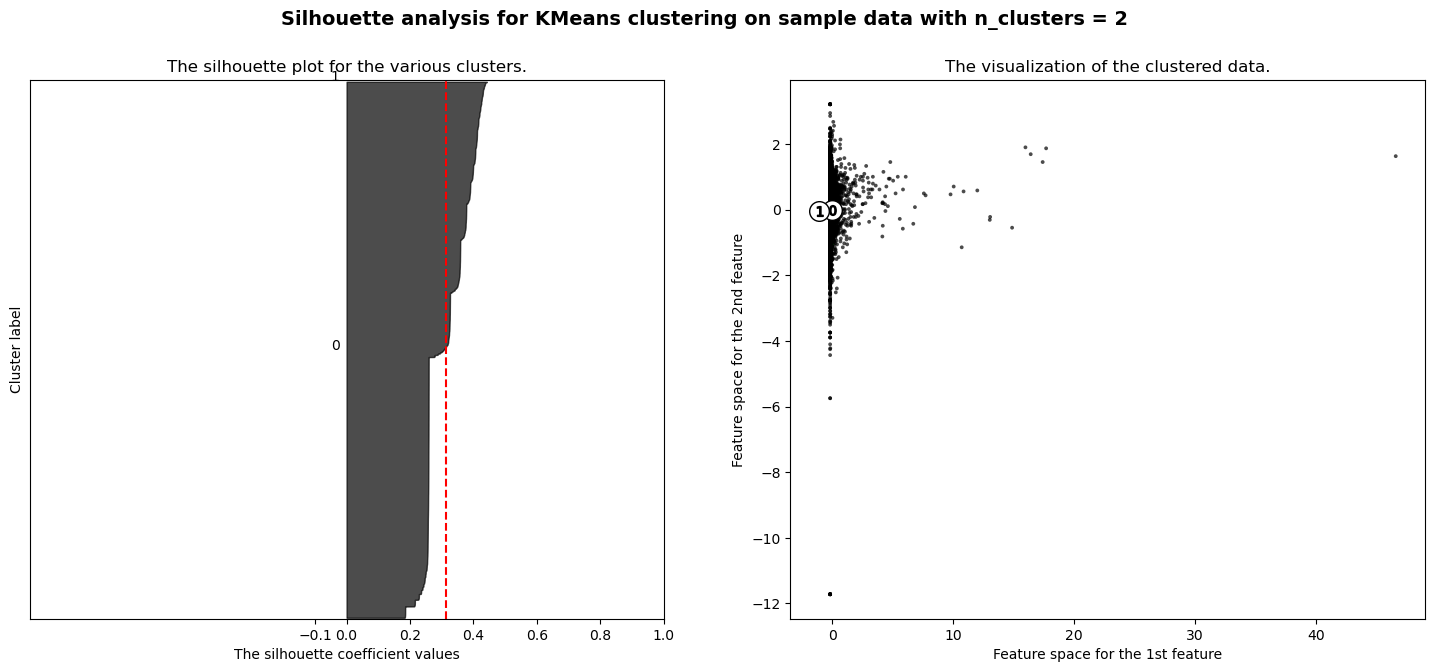

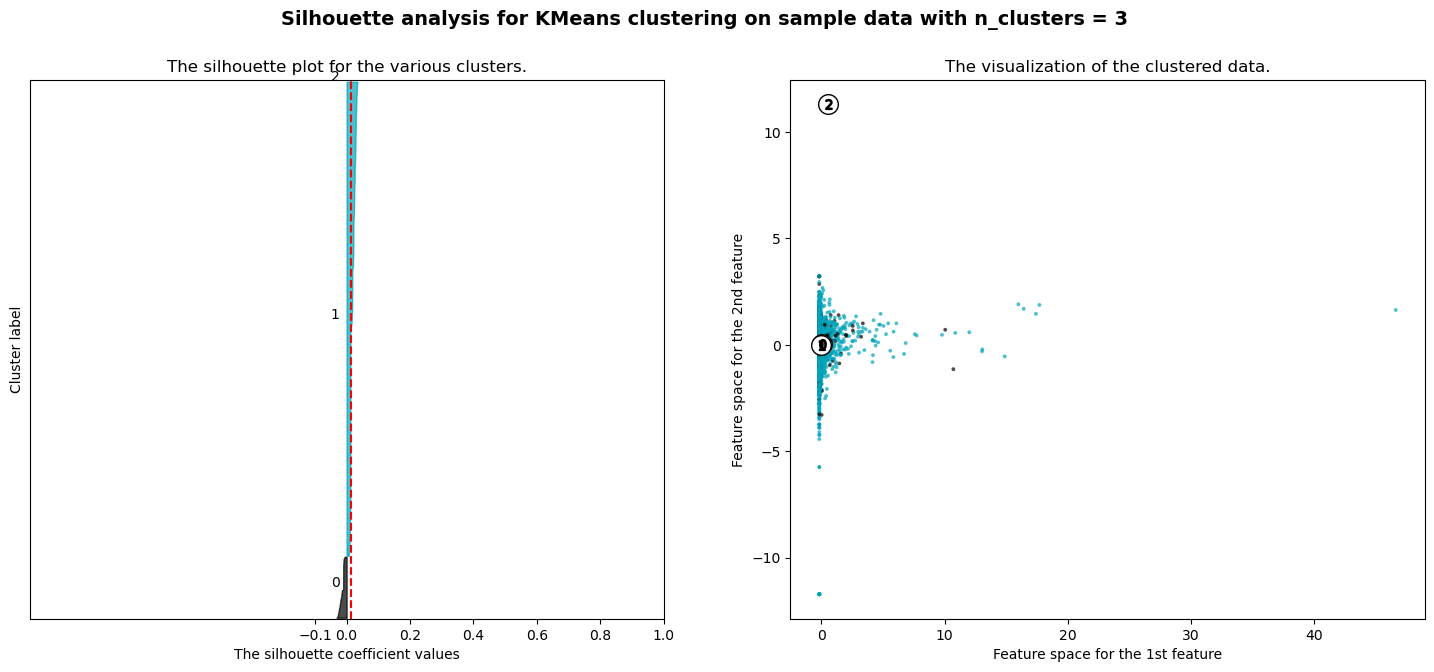

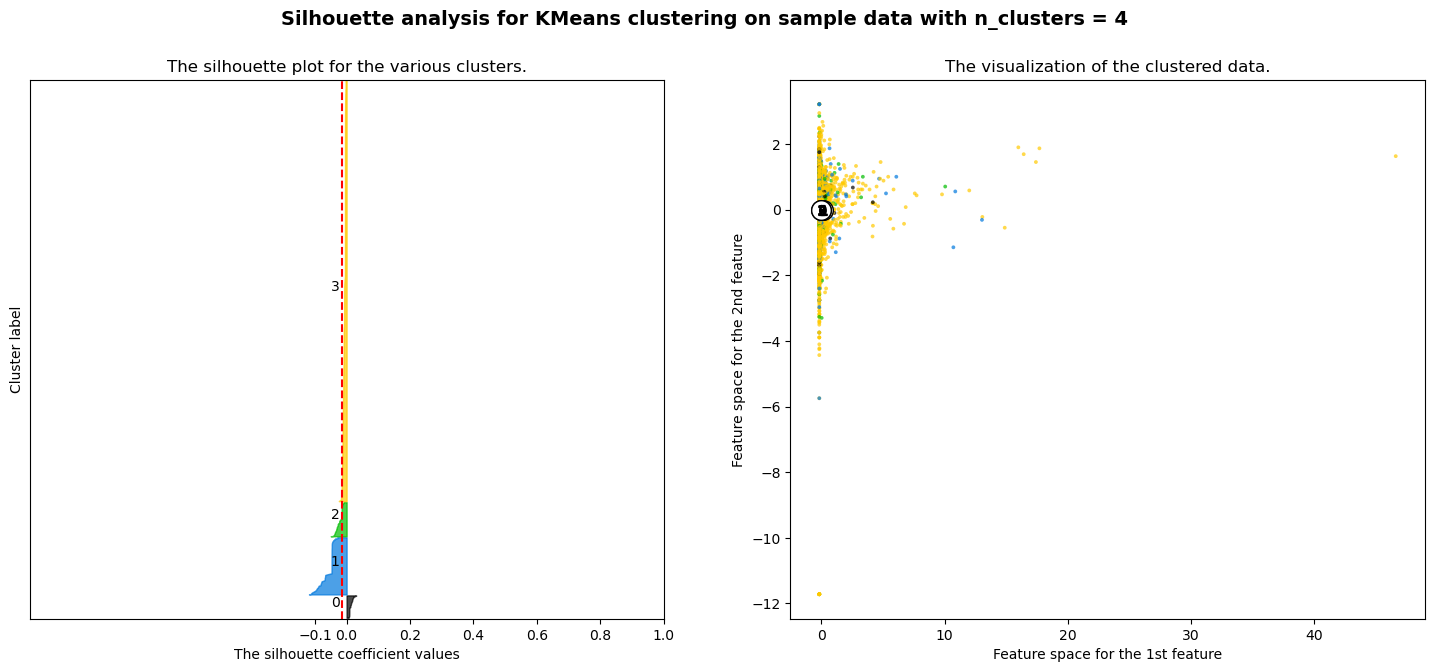

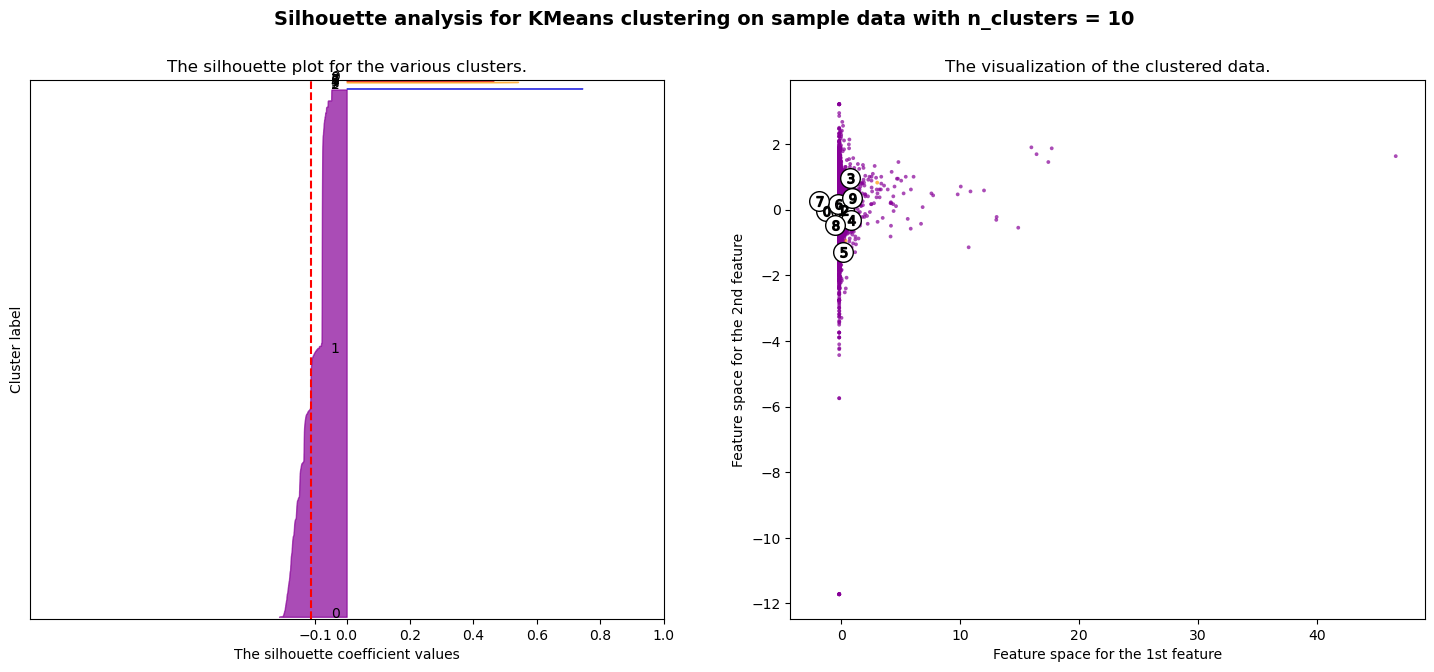

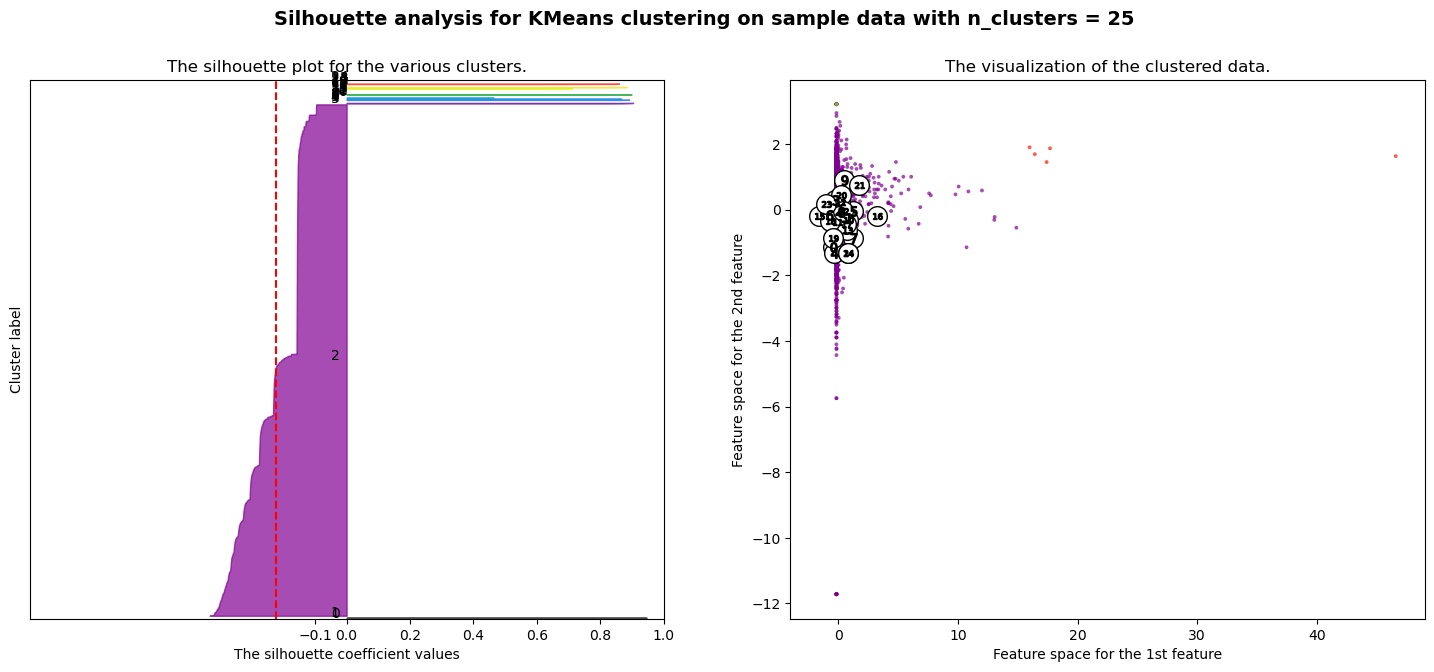

In [65]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1 to 1
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(filtered_dummies_df_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(filtered_dummies_df_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(filtered_dummies_df_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(filtered_dummies_df_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        filtered_dummies_df_scaled["ratings_count"], filtered_dummies_df_scaled["average_rating"], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### Run clustering model

In [66]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=2, random_state=42)

In [67]:
# Fit the K-Means model
model.fit(filtered_dummies_df_scaled)

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [68]:
# Predict the clusters using the scaled data
predictions = model.predict(filtered_dummies_df_scaled)

# Print the resulting array of cluster values.
# print(predictions)

In [69]:
# Create a copy of the DataFrame
predictions_df = filtered_dummies_df_scaled.copy()

In [70]:
# Add a new column to the DataFrame with the predicted clusters
predictions_df["predicted_clusters"] = predictions

# Display sample data
predictions_df.head()

average_rating  num_pages  ratings_count  authors_A. M. Homes  \
title                                                                           
Gilead               -0.220347  -0.420069      -0.156934            -0.018679   
Spider's Web         -0.280095  -0.445434      -0.117043            -0.018679   
The One Tree          0.138143   0.560697      -0.158503            -0.018679   
Rage of angels        0.018647   0.700203       0.085342            -0.018679   
The Four Loves        0.675879  -0.745583       0.119826            -0.018679   

                authors_A. N. Roquelaure;Anne Rice  authors_A.N. Roquelaure  \
title                                                                         
Gilead                                   -0.013207                -0.013207   
Spider's Web                             -0.013207                -0.013207   
The One Tree                             -0.013207                -0.013207   
Rage of angels                           -0.013207                -0.013207   
The Four Loves                           -0.013207                -0.013207   

                authors_Aaron Allston  authors_Abbie Hoffman  \
title                                                          
Gilead                      -0.013207              -0.013207   
Spider's Web                -0.013207              -0.013207   
The One Tree                -0.013207              -0.013207   
Rage of angels              -0.013207              -0.013207   
The Four Loves              -0.013207              -0.013207   

                authors_Abd Al-Hayy Moore  \
title                                       
Gilead                          -0.013207   
Spider's Web                    -0.013207   
The One Tree                    -0.013207   
Rage of angels                  -0.013207   
The Four Loves                  -0.013207   

                authors_Abraham B. Yehoshua;Hillel Halkin  ...  \
title                                                      ...   
Gilead                                          -0.013207  ...   
Spider's Web                                    -0.013207  ...   
The One Tree                                    -0.013207  ...   
Rage of angels                                  -0.013207  ...   
The Four Loves                                  -0.013207  ...   

                published_year_2009.0  published_year_2010.0  \
title                                                          
Gilead                      -0.022879              -0.032365   
Spider's Web                -0.022879              -0.032365   
The One Tree                -0.022879              -0.032365   
Rage of angels              -0.022879              -0.032365   
The Four Loves              -0.022879              -0.032365   

                published_year_2011.0  published_year_2012.0  \
title                                                          
Gilead                      -0.022879              -0.018679   
Spider's Web                -0.022879              -0.018679   
The One Tree                -0.022879              -0.018679   
Rage of angels              -0.022879              -0.018679   
The Four Loves              -0.022879              -0.018679   

                published_year_2013.0  published_year_2014.0  \
title                                                          
Gilead                      -0.022879              -0.018679   
Spider's Web                -0.022879              -0.018679   
The One Tree                -0.022879              -0.018679   
Rage of angels              -0.022879              -0.018679   
The Four Loves              -0.022879              -0.018679   

                published_year_2015.0  published_year_2017.0  \
title                                                          
Gilead                      -0.029542              -0.018679   
Spider's Web                -0.029542              -0.018679   
The One Tree                -0.029542              -0.018679   

In [71]:
clusters_plot = predictions_df.hvplot.scatter(
    x="average_rating",
    y="ratings_count",
    by = "predicted_clusters",
    hover_cols= "title"
)

clusters_plot

:NdOverlay   [predicted_clusters]
   :Scatter   [average_rating]   (ratings_count,title)

### Evaluate the model

In [72]:
# Evaluate the model using the Calinski-Harabasz Index
labels = model.labels_
metrics.calinski_harabasz_score(filtered_dummies_df_scaled, labels)

2.949650679591742

### PCA

In [73]:
# Create a PCA model instance
filtered_pca = PCA(n_components=2)

In [74]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
filtered_transformed_df = filtered_pca.fit_transform(filtered_dummies_df_scaled)

In [75]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
filtered_pca.explained_variance_ratio_

array([0.00064861, 0.00057899])

In [76]:
# Create the PCA DataFrame
filtered_pca_df = pd.DataFrame(
    filtered_transformed_df,
    columns=["PCA1", "PCA2"]
)

In [77]:
# Review the PCA DataFrame
filtered_pca_df.head()

PCA1      PCA2
0 -0.071603  0.707607
1  0.193457  1.417249
2  0.280485  1.073439
3  0.043521  0.199869
4 -0.643959 -2.762728

In [78]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

for i in k:
    k_model = KMeans(n_clusters=i, random_state=42)
    k_model.fit(filtered_pca_df)
    inertia.append(k_model.inertia_)

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

In [79]:
# Define a DataFrame to hold the values for k and the corresponding inertia
filtered_elbow_data = {"k": k, "inertia": inertia}

In [80]:
# Create the DataFrame from the elbow data
filtered_df_elbow = pd.DataFrame(filtered_elbow_data)

In [81]:
# Plot the DataFrame
filtered_df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

In [82]:
# Define the model Kmeans model using the optimal value of k for the number of clusters.
filtered_model = KMeans(n_clusters=3, random_state=42)

In [83]:
# Fit the model
filtered_model.fit(filtered_pca_df)

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [84]:
# Make predictions
filtered_predictions = filtered_model.predict(filtered_pca_df)

In [85]:
# Create a copy of the customers_pca_df DataFrame
filtered_pca_predictions_df = filtered_pca_df.copy()

In [86]:
# Add a class column with the labels
filtered_pca_predictions_df["predicted_clusters"] = filtered_predictions

In [87]:
# Add book title so that we can check how books are being clustered
filtered_pca_predictions_df["title"] = filtered_dummies_df_scaled.index

In [88]:
# Plot the clusters
filtered_pca_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="predicted_clusters",
    hover_cols = "title"
)

:NdOverlay   [predicted_clusters]
   :Scatter   [PCA1]   (PCA2,title)

In [89]:
# Evaluate using the Calinski-Harabasz Index
filtered_labels = filtered_model.labels_
metrics.calinski_harabasz_score(filtered_pca_df, filtered_labels)

4010.148173701663

## 4. Bin published year

### Prepare the data

In [90]:
# Drop columns that we are not using as features
df_reduced = df.drop(columns=["isbn13", "isbn10", "subtitle", "thumbnail", "description"])
df_reduced.head()

authors  \
title                                             
Gilead                       Marilynne Robinson   
Spider's Web    Charles Osborne;Agatha Christie   
The One Tree               Stephen R. Donaldson   
Rage of angels                   Sidney Sheldon   
The Four Loves              Clive Staples Lewis   

                                   categories  published_year  average_rating  \
title                                                                           
Gilead                                Fiction          2004.0            3.85   
Spider's Web    Detective and mystery stories          2000.0            3.83   
The One Tree                 American fiction          1982.0            3.97   
Rage of angels                        Fiction          1993.0            3.93   
The Four Loves                 Christian life          2002.0            4.15   

                num_pages  ratings_count  
title                                     
Gilead              247.0          361.0  
Spider's Web        241.0         5164.0  
The One Tree        479.0          172.0  
Rage of angels      512.0        29532.0  
The Four Loves      170.0        33684.0

In [91]:
# Check earliest and latest published year to be limits of binning

print(f"Earliest book published in: {df['published_year'].min()}")
print(f"Latest book published in: {df['published_year'].max()}")

Earliest book published in: 1876.0
Latest book published in: 2019.0


In [92]:
# Bin published year
for i in range(0, len(df_reduced)):
    if df_reduced["published_year"][i] < 1980:
        df_reduced["published_year"][i] = "pre-1980"
    elif 1980 <= df_reduced["published_year"][i] < 1990:
        df_reduced["published_year"][i] = "1980-1990"
    elif 1990 <= df_reduced["published_year"][i] < 2000:
        df_reduced["published_year"][i] = "1990-2000"
    elif 2000 <= df_reduced["published_year"][i] < 2010:
        df_reduced["published_year"][i] = "2000-2010"
    else:
        df_reduced["published_year"][i] = "2010-2020"
        
# Check result of binning
df_reduced.head(10)

C:\Users\catis\AppData\Local\Temp\ipykernel_13908\3831150787.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced["published_year"][i] = "2000-2010"


authors  \
title                                                     
Gilead                               Marilynne Robinson   
Spider's Web            Charles Osborne;Agatha Christie   
The One Tree                       Stephen R. Donaldson   
Rage of angels                           Sidney Sheldon   
The Four Loves                      Clive Staples Lewis   
The Problem of Pain                 Clive Staples Lewis   
An Autobiography                        Agatha Christie   
Empires of the Monsoon                     Richard Hall   
The Gap Into Madness               Stephen R. Donaldson   
Master of the Game                       Sidney Sheldon   

                                                 categories published_year  \
title                                                                        
Gilead                                              Fiction      2000-2010   
Spider's Web                  Detective and mystery stories      2000-2010   
The One Tree                               American fiction      1980-1990   
Rage of angels                                      Fiction      1990-2000   
The Four Loves                               Christian life      2000-2010   
The Problem of Pain                          Christian life      2000-2010   
An Autobiography                           Authors, English       pre-1980   
Empires of the Monsoon                         Africa, East      1990-2000   
The Gap Into Madness    Hyland, Morn (Fictitious character)      1990-2000   
Master of the Game                        Adventure stories      1980-1990   

                        average_rating  num_pages  ratings_count  
title                                                             
Gilead                            3.85      247.0          361.0  
Spider's Web                      3.83      241.0         5164.0  
The One Tree                      3.97      479.0          172.0  
Rage of angels                    3.93      512.0        29532.0  
The Four Loves                    4.15      170.0        33684.0  
The Problem of Pain               4.09      176.0        37569.0  
An Autobiography                  4.27      560.0         3975.0  
Empires of the Monsoon            4.41      608.0           65.0  
The Gap Into Madness              4.15      743.0          103.0  
Master of the Game                4.11      489.0        43540.0

In [93]:
# One hot-encode categorical variables
dummies_df = pd.get_dummies(df_reduced, columns=['authors', 'categories', "published_year"])
dummies_df.head()

average_rating  num_pages  ratings_count  authors_A. Hatto  \
title                                                                        
Gilead                    3.85      247.0          361.0             False   
Spider's Web              3.83      241.0         5164.0             False   
The One Tree              3.97      479.0          172.0             False   
Rage of angels            3.93      512.0        29532.0             False   
The Four Loves            4.15      170.0        33684.0             False   

                authors_A. M. Homes  authors_A. N. Roquelaure;Anne Rice  \
title                                                                     
Gilead                        False                               False   
Spider's Web                  False                               False   
The One Tree                  False                               False   
Rage of angels                False                               False   
The Four Loves                False                               False   

                authors_A.N. Roquelaure  authors_Aaron Allston  \
title                                                            
Gilead                            False                  False   
Spider's Web                      False                  False   
The One Tree                      False                  False   
Rage of angels                    False                  False   
The Four Loves                    False                  False   

                authors_Abbie Hoffman  authors_Abd Al-Hayy Moore  ...  \
title                                                             ...   
Gilead                          False                      False  ...   
Spider's Web                    False                      False  ...   
The One Tree                    False                      False  ...   
Rage of angels                  False                      False  ...   
The Four Loves                  False                      False  ...   

                categories_Women terrorists  \
title                                         
Gilead                                False   
Spider's Web                          False   
The One Tree                          False   
Rage of angels                        False   
The Four Loves                        False   

                categories_Yoknapatawpha County (Imaginary place)  \
title                                                               
Gilead                                                      False   
Spider's Web                                                False   
The One Tree                                                False   
Rage of angels                                              False   
The Four Loves                                              False   

                categories_Young Adult Fiction  categories_Zero (The number)  \
title                                                                          
Gilead                                   False                         False   
Spider's Web                             False                         False   
The One Tree                             False                         False   
Rage of angels                           False                         False   
The Four Loves                           False                         False   

                categories_Zoology  published_year_1980-1990  \
title                                                          
Gilead                       False                     False   
Spider's Web                 False                     False   
The One Tree                 False                      True   
Rage of angels               False                     False   
The Four Loves               False                     False   

                published_year_1990-2000  published_year_2000-2010  \
title                                                                
Gile

In [94]:
# Scale the numeric variables
scaled_data = StandardScaler().fit_transform(dummies_df)

In [95]:
# Create a DataFrame with the scaled data
dummies_df_scaled = pd.DataFrame(
    scaled_data,
    columns= dummies_df.columns
)

# Copy the title names from the data
dummies_df_scaled["title"] = dummies_df.index

# Set the coinid column as index
dummies_df_scaled.set_index("title", inplace = True)

# Display sample data
dummies_df_scaled.head()

average_rating  num_pages  ratings_count  authors_A. Hatto  \
title                                                                        
Gilead               -0.231295  -0.418666      -0.157864         -0.012914   
Spider's Web         -0.291564  -0.444161      -0.117492         -0.012914   
The One Tree          0.130323   0.567149      -0.159453         -0.012914   
Rage of angels        0.009784   0.707373       0.087337         -0.012914   
The Four Loves        0.672749  -0.745854       0.122237         -0.012914   

                authors_A. M. Homes  authors_A. N. Roquelaure;Anne Rice  \
title                                                                     
Gilead                    -0.018265                           -0.012914   
Spider's Web              -0.018265                           -0.012914   
The One Tree              -0.018265                           -0.012914   
Rage of angels            -0.018265                           -0.012914   
The Four Loves            -0.018265                           -0.012914   

                authors_A.N. Roquelaure  authors_Aaron Allston  \
title                                                            
Gilead                        -0.012914              -0.012914   
Spider's Web                  -0.012914              -0.012914   
The One Tree                  -0.012914              -0.012914   
Rage of angels                -0.012914              -0.012914   
The Four Loves                -0.012914              -0.012914   

                authors_Abbie Hoffman  authors_Abd Al-Hayy Moore  ...  \
title                                                             ...   
Gilead                      -0.012914                  -0.012914  ...   
Spider's Web                -0.012914                  -0.012914  ...   
The One Tree                -0.012914                  -0.012914  ...   
Rage of angels              -0.012914                  -0.012914  ...   
The Four Loves              -0.012914                  -0.012914  ...   

                categories_Women terrorists  \
title                                         
Gilead                            -0.012914   
Spider's Web                      -0.012914   
The One Tree                      -0.012914   
Rage of angels                    -0.012914   
The Four Loves                    -0.012914   

                categories_Yoknapatawpha County (Imaginary place)  \
title                                                               
Gilead                                                  -0.012914   
Spider's Web                                            -0.012914   
The One Tree                                            -0.012914   
Rage of angels                                          -0.012914   
The Four Loves                                          -0.012914   

                categories_Young Adult Fiction  categories_Zero (The number)  \
title                                                                          
Gilead                               -0.031647                     -0.012914   
Spider's Web                         -0.031647                     -0.012914   
The One Tree                         -0.031647                     -0.012914   
Rage of angels                       -0.031647                     -0.012914   
The Four Loves                       -0.031647                     -0.012914   

                categories_Zoology  published_year_1980-1990  \
title                                                          
Gilead                   -0.012914                 -0.254575   
Spider's Web             -0.012914                 -0.254575   
The One Tree             -0.012914                  3.928121   
Rage of angels           -0.012914                 -0.254575   
The Four Loves           -0.012914                 -0.254575   

                published_year_1990-2000  published_year_2000-2010  \
title                                                                
Gile

### Find best number of K - elbow method

In [96]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))
inertia = []

for i in k:
    k_model = KMeans(n_clusters=i, random_state=42)
    k_model.fit(dummies_df_scaled)
    inertia.append(k_model.inertia_)

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

In [97]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [98]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

elbow_plot

:Curve   [k]   (inertia)

### Find best number of K - silhouette method

In [99]:
range_n_clusters = [2, 3, 4, 10, 25]

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.03494652646451771


C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : -0.029975848342347317


C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : -0.20859608989623402


C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10 The average silhouette_score is : -0.25157805835265606


C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 25 The average silhouette_score is : -0.26578103184439716


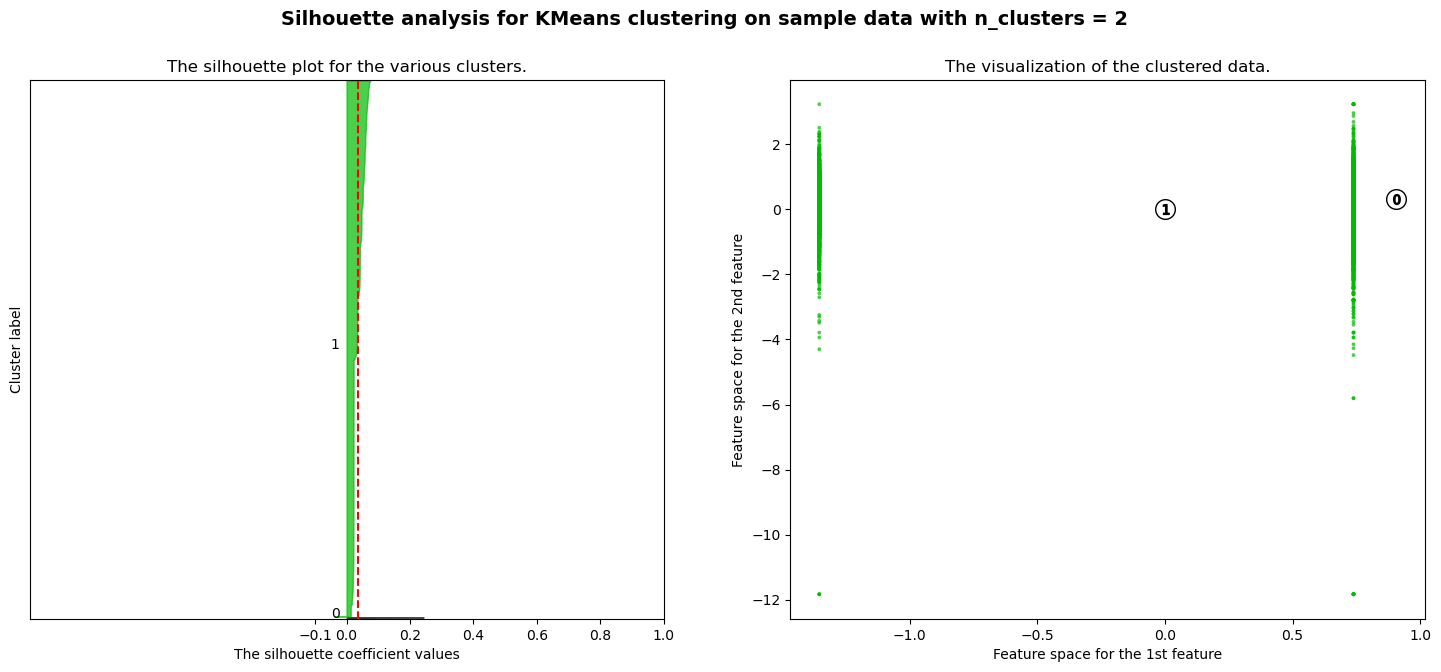

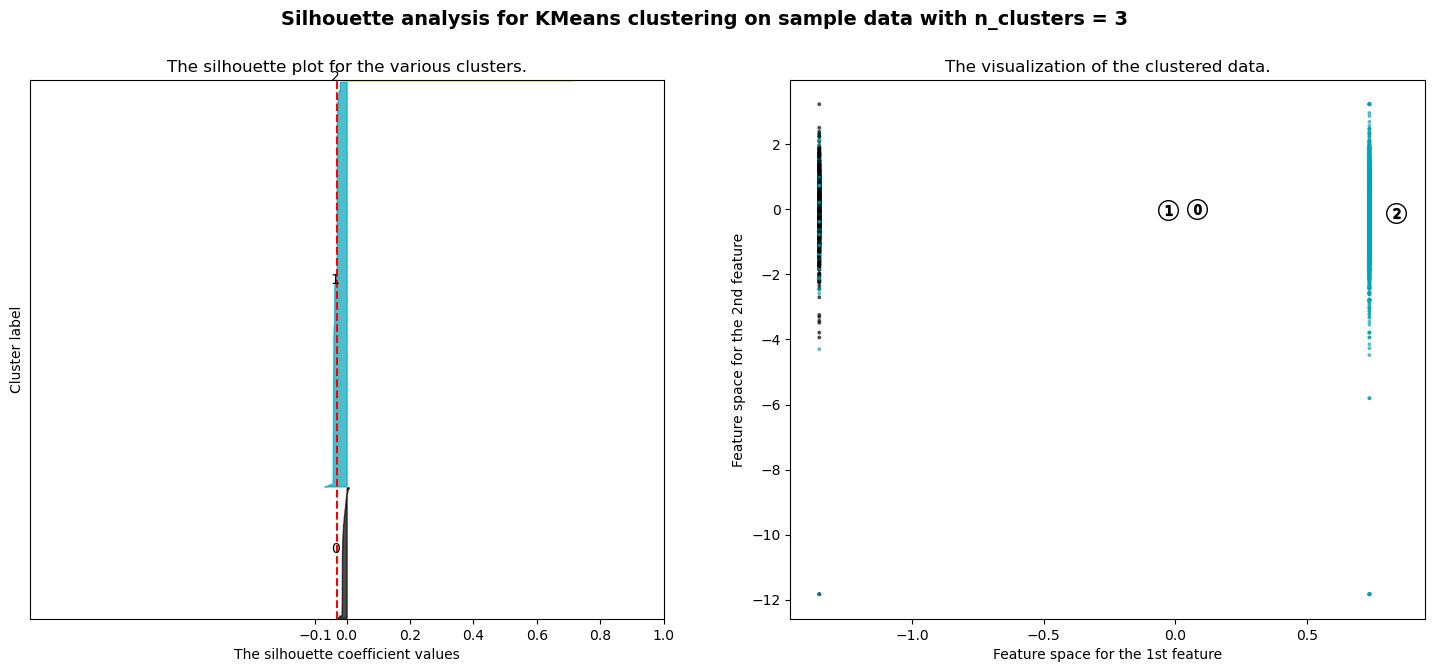

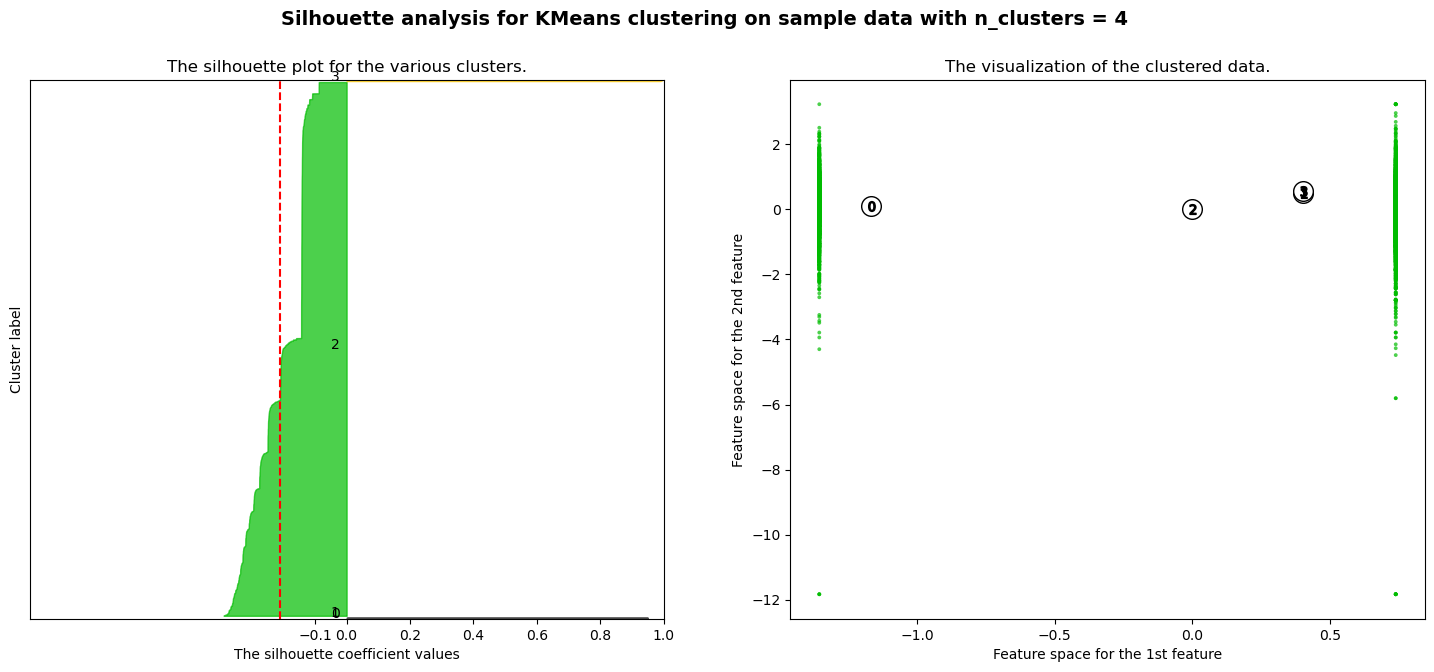

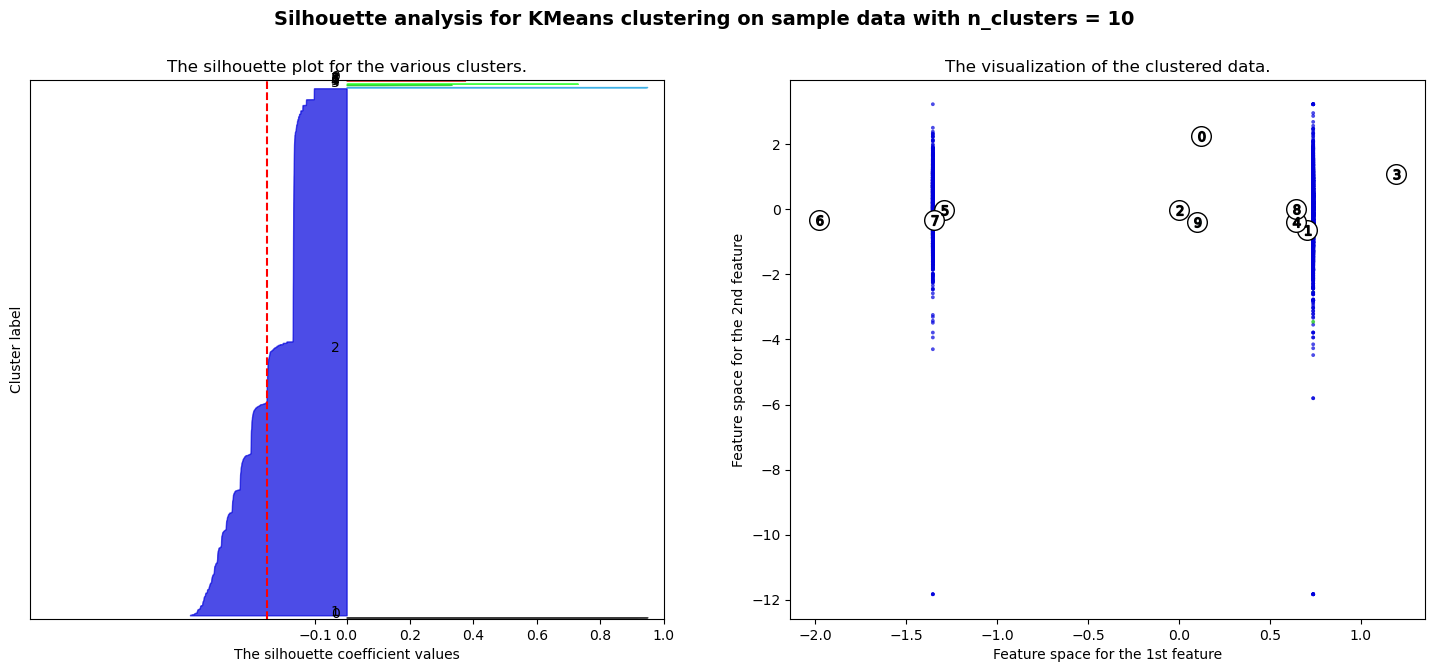

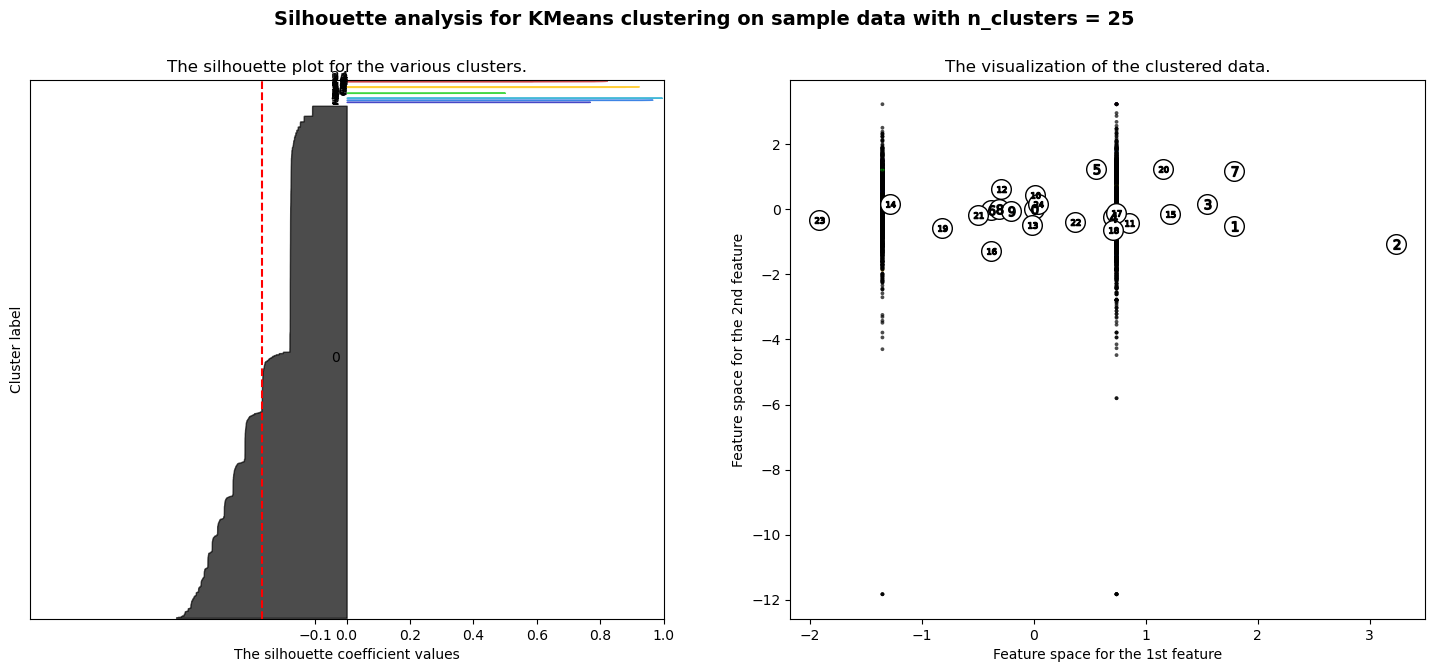

In [100]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1 to 1
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dummies_df_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(dummies_df_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dummies_df_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dummies_df_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        dummies_df_scaled["published_year_2000-2010"], dummies_df_scaled["average_rating"], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### Run clustering model

In [101]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=2, random_state=42)

In [102]:
# Fit the K-Means model
model.fit(dummies_df_scaled)

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [103]:
# Predict the clusters using the scaled data
predictions = model.predict(dummies_df_scaled)

# Print the resulting array of cluster values.
# print(predictions)

In [104]:
# Create a copy of the DataFrame
predictions_df = dummies_df_scaled.copy()

In [105]:
# Add a new column to the DataFrame with the predicted clusters
predictions_df["predicted_clusters"] = predictions

In [106]:
clusters_plot = predictions_df.hvplot.scatter(
    x="average_rating",
    y="ratings_count",
    by = "predicted_clusters",
    hover_cols= "title"
)

clusters_plot

:NdOverlay   [predicted_clusters]
   :Scatter   [average_rating]   (ratings_count,title)

### Evaluate the model

In [107]:
# Evaluate the model using the Calinski-Harabasz Index
labels = model.labels_
metrics.calinski_harabasz_score(dummies_df_scaled, labels)

2.350497059211196

### PCA

In [108]:
# Create a PCA model instance
pca = PCA(n_components=2)

In [109]:
# Use the PCA model with `fit_transform` to reduce to 2 principal components
transformed_df = pca.fit_transform(dummies_df_scaled)

In [110]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.00068224, 0.00057177])

In [111]:
# Create the PCA DataFrame
pca_df = pd.DataFrame(
    transformed_df,
    columns=["PCA1", "PCA2"]
)

# Review the PCA DataFrame
pca_df.head()

PCA1      PCA2
0 -1.198519  0.670086
1 -1.828759  0.050801
2  1.864829  0.622278
3  1.993007  1.108103
4 -1.203215 -1.944666

In [112]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

In [113]:
for i in k:
    k_model = KMeans(n_clusters=i, random_state=42)
    k_model.fit(pca_df)
    inertia.append(k_model.inertia_)

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

In [114]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

In [115]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

In [116]:
# Define the model Kmeans model using the optimal value of k for the number of clusters.
model = KMeans(n_clusters=4, random_state=42)

# Fit the model
model.fit(pca_df)

# Make predictions
predictions = model.predict(pca_df)

# Create a copy of the customers_pca_df DataFrame
pca_predictions_df = pca_df.copy()

# Add a class column with the labels
pca_predictions_df["predicted_clusters"] = predictions

# Add book title so that we can check how books are being clustered
pca_predictions_df["title"] = dummies_df_scaled.index

C:\Users\catis\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [117]:
# Plot the clusters
pca_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="predicted_clusters",
    hover_cols = "title"
)

:NdOverlay   [predicted_clusters]
   :Scatter   [PCA1]   (PCA2,title)

In [118]:
# Evaluate using the Calinski-Harabasz Index
labels = model.labels_
metrics.calinski_harabasz_score(pca_df, labels)

4031.181306298218

### Optimization when filtering or binning published_year

- Filtering or binning published year did not improve model performance, with a K-means model ran on the cleaned dataset resulting in Calinski-Harabasz Index score of 2.95 and 2.35 for the filtered and binned models respectively.  
- Running the K-means algorithm on PCA transformed data (with 2 principal components) on filtered and binned data did not improve model performance, with the filtered data resulting in a Calinski-Harabasz Index score of 4010.15 (k=3), and the binned data in a score of 4031.18 (k=4).

## Conclusion
- The best performing model (more variance explained and higher Calinski-Harabasz Index) is the model without the "authors" column, ran on PCA data. However, just like the original PCA model, this result seems highly biased by 2 outlier books. In the notebook model_optimisation_no_outliers, we re-run all the analyses above without these 2 books.